# **Project: SENTIMENT ANALYSIS OF AIRBNB REVIEWS**

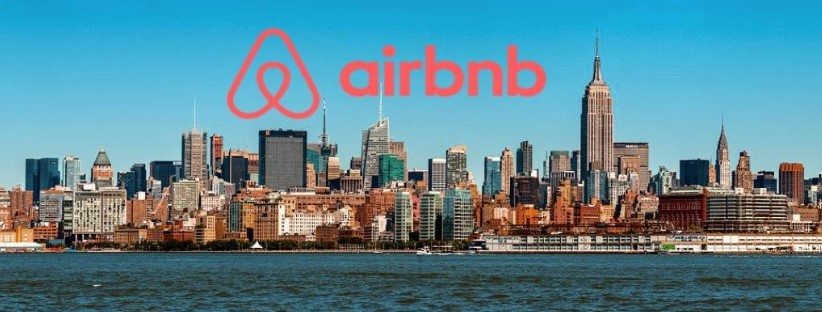

# TEAM : SENTIMENT SYNTHESIZERS

## -- Avantika Gargya, Basava Satish Velagapudi, Krisha Gandhi, Kenneth Fung, Sai Bharadwaj

# **Problem Statement**

In [ ]:
# Advanced NLP-Driven Insights from Airbnb Reviews for Neighborhood & Listing Centric Recommendations.

# **Project Goals**

In [ ]:
# Help Hosts understand the positive and negative aspects of the property, fix issues and boost their bookings
# Help Customers quickly assess listings & make an informed booking
# Help Airbnb identify trends, highlight popular areas and optimize pricing and market strategy

# 1.Installing & Importing Libraries

In [ ]:
!pip install swifter
!apt-get update
!apt-get install -y libenchant-2-2
!pip install pyenchant
!pip install pyenchant
!pip install deep_translator
!pip install textblob
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=d93a8cedda42695849389ba6110d6d9b31e83daf5b62c71b54fc5b8610ab8f2c
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,341 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ub

In [ ]:
# Import libraries
import re
import nltk
import string
import swifter
import enchant
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import words
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import mean_squared_error
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from langdetect import detect, LangDetectException
from deep_translator import GoogleTranslator
from sklearn.feature_extraction.text import TfidfVectorizer

# Download required NLTK resources
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Mounting Google Drive

In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

from google.colab import files

Mounted at /content/drive


# 2.Loading the Datasets

In [ ]:
reviews_df = pd.read_csv("/content/drive/MyDrive/NLP Project/reviews.csv")
#reviews_df = pd.read_csv("/reviews.csv")
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


In [ ]:
listings_df = pd.read_csv("/content/drive/MyDrive/listings.csv")
#listings_df = pd.read_csv("/content/drive/MyDrive/NLP Project/listings.csv")
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,39572,https://www.airbnb.com/rooms/39572,20250103033441,2025-01-03,city scrape,1 br in a 2 br apt (Midtown West),NaN,NaN,https://a0.muscache.com/pictures/fd1bffd9-ccf8...,169927,...,5.00,4.98,4.86,NaN,f,2,1,1,0,0.25
1,39593,https://www.airbnb.com/rooms/39593,20250103033441,2025-01-03,city scrape,A lovely room w/ a Manhattan view,"A private, furnished large room to rent Jan/F...","Nate Silver called this super safe, clean, qui...",https://a0.muscache.com/pictures/0b9110f7-3b24...,110506,...,4.96,4.79,4.93,NaN,f,1,0,1,0,0.20
2,39704,https://www.airbnb.com/rooms/39704,20250103033441,2025-01-03,previous scrape,"Private, Large & Sunny 1BR w/W&D",It's a No Brainer:<br />•Terrific Space For Le...,The Neighborhood<br />• Rich History <br />• B...,https://a0.muscache.com/pictures/0bc4e8a4-c047...,170510,...,4.92,4.38,4.72,NaN,f,2,2,0,0,1.93
3,42300,https://www.airbnb.com/rooms/42300,20250103033441,2025-01-03,city scrape,Beautiful Lower East Side Loft,Architect-owned loft is a corner unit in a bea...,"The apartment is in the border of Soho, LES an...",https://a0.muscache.com/pictures/0e285e13-ee14...,184755,...,4.87,4.57,4.62,NaN,f,1,1,0,0,0.40
4,42729,https://www.airbnb.com/rooms/42729,20250103033441,2025-01-03,city scrape,@HouseOnHenrySt - Private 2nd bedroom w/shared...,NaN,"Lovely old Brooklyn neighborhood, with brick/b...",https://a0.muscache.com/pictures/925fe213-f5e1...,11481,...,4.73,4.58,4.64,NaN,f,4,1,3,0,1.26


In [ ]:
neighbourhoods_df = pd.read_csv("/content/drive/MyDrive/neighbourhoods.csv")
neighbourhoods_df.head()

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [ ]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
listings_df['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island'],
      dtype=object)

In [ ]:
print("Property type: ", listings_df['room_type'].unique())

Property type:  ['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [ ]:
listings_df[['id', 'neighbourhood_group_cleansed', 'price', 'room_type']].isnull().sum()

,0
id,0
neighbourhood_group_cleansed,0
price,14815
room_type,0


There are ~14K properties listed that do not have a price listed against them. Once we process the data by neighbourhood groups we can impute by the median value for their respective neighbourhood.

In [ ]:
reviews_df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [ ]:
reviews_df.isnull().sum()

,0
listing_id,0
id,0
date,0
reviewer_id,0
reviewer_name,3
comments,235


There are ~200 properties listed that do not have a review given for them. Once we process the data by neighbourhood groups we can impute by removing all the reviews that are null.

In [ ]:
neighbourhoods_df.columns

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

In [ ]:
neighbourhoods_df['neighbourhood_group'].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

Number of Columns for every file :

In [ ]:
#Number of columns in listings_df

print("Listings : ", listings_df.columns.size)
print("Reviews : ", reviews_df.columns.size)
print("Neighborhoods: ", neighbourhoods_df.columns.size)

Listings :  75
Reviews :  6
Neighborhoods:  2


Shape for every file:

In [ ]:
print("Listings : ", listings_df.shape)
print("Reviews : ", reviews_df.shape)
print("Neighborhoods: ", neighbourhoods_df.shape)

Listings :  (37784, 75)
Reviews :  (969486, 6)
Neighborhoods:  (230, 2)


In potentially building the recommendation system, we can incorporate the following columns :

- neighborhood_overview

- review_scores_rating

- amenities

For now, we can merge the reviews.csv and listings.csv on the listing id and add the following columns to the reviews :

- neighbourhood_group_cleansed

- room_type

- price

# 3.Merging the Datasets

We merge the listings.csv and reviews.csv on the listing id column and add the aforementioned columns. Additionally, we rename a few columns for more readability.

In [ ]:
# Prepare the listings dataframe: select columns, rename, and set index to 'id'
listings_join = listings_df[['id', 'neighbourhood_group_cleansed', 'room_type', 'price']].rename(
    columns={'neighbourhood_group_cleansed': 'neighbourhood_group'}
).set_index('id')

# Set the index of the reviews dataframe to 'listing_id'
reviews_indexed = reviews_df[['listing_id', 'id', 'date','comments']].rename(
    columns={'comments': 'reviews', 'id':'review_id'}).set_index('listing_id')

# Join the two dataframes
reviews_merged_df = reviews_indexed.join(listings_join, how='left').reset_index()

In [ ]:
reviews_merged_df

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price
0,2595,17857,2009-11-21,Notre séjour de trois nuits.\r<br/>Nous avons ...,Manhattan,Entire home/apt,$240.00
1,2595,19176,2009-12-05,Great experience.,Manhattan,Entire home/apt,$240.00
2,2595,19760,2009-12-10,I've stayed with my friend at the Midtown Cast...,Manhattan,Entire home/apt,$240.00
3,2595,34320,2010-04-09,"We've been staying here for about 9 nights, en...",Manhattan,Entire home/apt,$240.00
4,2595,46312,2010-05-25,We had a wonderful stay at Jennifer's charming...,Manhattan,Entire home/apt,$240.00
...,...,...,...,...,...,...,...
969481,1295054021439479562,1318207836791174950,2024-12-23,The place was amazing! Great location and area...,Manhattan,Entire home/apt,$400.00
969482,1295058207773420592,1302324242336666111,2024-12-01,This was the perfect stay for our trip. Margar...,Queens,Entire home/apt,$175.00
969483,1295058207773420592,1305143295960134335,2024-12-05,….lugar increíble me sentí como en casa,Queens,Entire home/apt,$175.00
969484,1295058207773420592,1309605174750125344,2024-12-11,We loved this place and would stay again. Our...,Queens,Entire home/apt,$175.00


# 4.Handling Missing Values


## 3.1. Missing Reviews

In [ ]:
reviews_merged_df.isnull().sum()

,0
listing_id,0
review_id,0
date,0
reviews,235
neighbourhood_group,0
room_type,0
price,199384


For missing review values, we can impute them by removing those rows

In [ ]:
reviews_merged_df = reviews_merged_df.dropna(subset=['reviews'])

In [ ]:
reviews_merged_df.isnull().sum()

,0
listing_id,0
review_id,0
date,0
reviews,0
neighbourhood_group,0
room_type,0
price,199347


## 3.2. Missing Price Values

- For missing price values, we can impute median values according to the neighbourhood

- Our Price column contains values with the "$" sign, before imputing with the median price for the neighbourhood, we need to remove the sign and convert it into a numeric column

In [ ]:
# Remove the $ sign and convert price to numeric
reviews_merged_df.loc[:, 'price'] = reviews_merged_df['price'].replace('[$,]', '', regex=True).astype(float)

# Impute missing price values with the median price of the corresponding neighbourhood
reviews_merged_df.loc[:, 'price'] = reviews_merged_df.groupby('neighbourhood_group')['price'].transform(lambda x: x.fillna(x.median()))

# Verify if there are any remaining missing values
print("Missing values in 'price' after imputation:", reviews_merged_df['price'].isnull().sum())

Missing values in 'price' after imputation: 0


Number of null values after the imputation processes:

In [ ]:
reviews_merged_df.isnull().sum()

,0
listing_id,0
review_id,0
date,0
reviews,0
neighbourhood_group,0
room_type,0
price,0


We have no missing values anymore

# 5.Exploratory Data Analysis

## 5.1. Visualizations

In [ ]:
# Set a clean, modern style and color palette
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

### 5.1.1. Neighbourhood Group Distribution

In [ ]:
# Analyze 'neighbourhood_group' distribution
neighbourhood_counts = reviews_merged_df['neighbourhood_group'].value_counts()
print("\nNeighbourhood Group Counts:")
print(neighbourhood_counts)


Neighbourhood Group Counts:
neighbourhood_group
Brooklyn         410086
Manhattan        339505
Queens           174286
Bronx             31819
Staten Island     13555
Name: count, dtype: int64


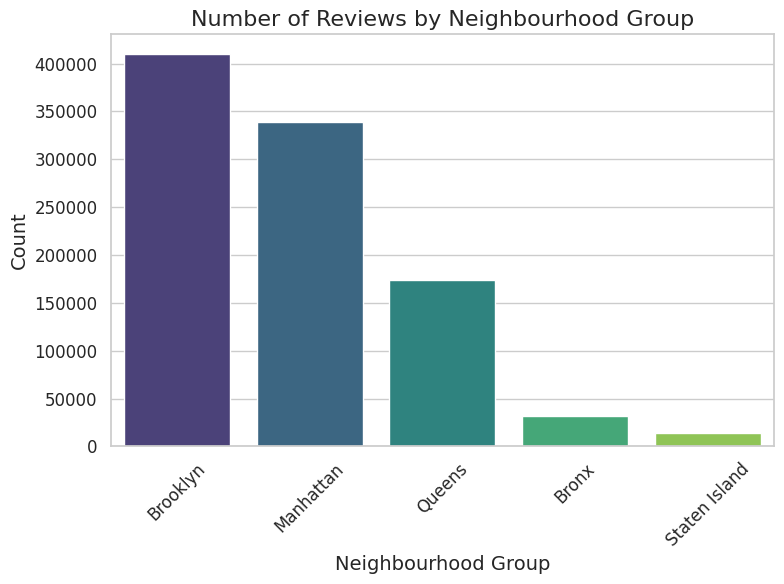

In [ ]:
#Plot 1: Neighbourhood distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, palette='viridis')
plt.title('Number of Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6.Splitting into 5 Boroughs_New York

In [ ]:
reviews_merged_df['neighbourhood_group'].unique()

array(['Manhattan', 'Brooklyn', 'Staten Island', 'Queens', 'Bronx'],
      dtype=object)

In [ ]:
reviews_merged_df.columns

Index(['listing_id', 'review_id', 'date', 'reviews', 'neighbourhood_group',
       'room_type', 'price', 'review_length'],
      dtype='object')

In [ ]:
reviews_merged_df = reviews_merged_df.drop(columns=['review_length'])

In [ ]:
reviews_merged_df

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price
0,2595,17857,2009-11-21,Notre séjour de trois nuits.\r<br/>Nous avons ...,Manhattan,Entire home/apt,240.0
1,2595,19176,2009-12-05,Great experience.,Manhattan,Entire home/apt,240.0
2,2595,19760,2009-12-10,I've stayed with my friend at the Midtown Cast...,Manhattan,Entire home/apt,240.0
3,2595,34320,2010-04-09,"We've been staying here for about 9 nights, en...",Manhattan,Entire home/apt,240.0
4,2595,46312,2010-05-25,We had a wonderful stay at Jennifer's charming...,Manhattan,Entire home/apt,240.0
...,...,...,...,...,...,...,...
969481,1295054021439479562,1318207836791174950,2024-12-23,The place was amazing! Great location and area...,Manhattan,Entire home/apt,400.0
969482,1295058207773420592,1302324242336666111,2024-12-01,This was the perfect stay for our trip. Margar...,Queens,Entire home/apt,175.0
969483,1295058207773420592,1305143295960134335,2024-12-05,….lugar increíble me sentí como en casa,Queens,Entire home/apt,175.0
969484,1295058207773420592,1309605174750125344,2024-12-11,We loved this place and would stay again. Our...,Queens,Entire home/apt,175.0


In [ ]:
reviews_merged_df['reviews'] = reviews_merged_df['reviews'].str.replace(r'\r<br/>', ' ', regex=True)

In [ ]:
reviews_merged_df['reviews'] = reviews_merged_df['reviews'].str.replace(r'<br/>', ' ', regex=True)

In [ ]:
manhattan_df = reviews_merged_df[reviews_merged_df['neighbourhood_group']=="Manhattan"]
queens_df = reviews_merged_df[reviews_merged_df['neighbourhood_group']=="Queens"]
bronx_df = reviews_merged_df[reviews_merged_df['neighbourhood_group']=="Bronx"]
staten_df = reviews_merged_df[reviews_merged_df['neighbourhood_group']=="Staten Island"]
brooklyn_df = reviews_merged_df[reviews_merged_df['neighbourhood_group']=="Brooklyn"]

In [ ]:
manhattan_df = pd.read_csv("/content/drive/MyDrive/NLP Project Sats/Before_lang_translation_merged_neighbourhoods.csv")

# 7.Language Detection across all the reviews over the 5 Boroughs

In [ ]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"  # Handle exception if language detection fails

In [ ]:
# Detecting language for each review
brooklyn_df['language'] = brooklyn_df['reviews'].apply(detect_language)

brooklyn_df.head(10)

In [ ]:
# Detecting language for each review
manhattan_df['language'] = manhattan_df['reviews'].apply(detect_language)

manhattan_df.head(10)

<ipython-input-58-61d5308c4a60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan_df['language'] = manhattan_df['reviews'].apply(detect_language)


,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
0,2595,17857,2009-11-21,Notre séjour de trois nuits. Nous avons appréc...,Manhattan,Entire home/apt,240.0,fr
1,2595,19176,2009-12-05,Great experience.,Manhattan,Entire home/apt,240.0,ro
2,2595,19760,2009-12-10,I've stayed with my friend at the Midtown Cast...,Manhattan,Entire home/apt,240.0,en
3,2595,34320,2010-04-09,"We've been staying here for about 9 nights, en...",Manhattan,Entire home/apt,240.0,en
4,2595,46312,2010-05-25,We had a wonderful stay at Jennifer's charming...,Manhattan,Entire home/apt,240.0,en
5,2595,1238204,2012-05-07,Hi to everyone! Would say our greatest complim...,Manhattan,Entire home/apt,240.0,en
6,2595,1293632,2012-05-17,"Jennifer was very friendly and helpful, and he...",Manhattan,Entire home/apt,240.0,en
7,2595,2022498,2012-08-18,This apartment is like a real castle old and u...,Manhattan,Entire home/apt,240.0,en
8,2595,4682989,2013-05-20,Jennifer's place was in a great midtown locati...,Manhattan,Entire home/apt,240.0,en
9,2595,13193832,2014-05-21,Jennifer is a very nice host. Everything is cl...,Manhattan,Entire home/apt,240.0,en


In [ ]:
# Detecting language for each review
queens_df['language'] = queens_df['reviews'].apply(detect_language)

queens_df.head(10)

<ipython-input-62-fee4954703ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queens_df['language'] = queens_df['reviews'].apply(detect_language)


,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
3290,231154,616617,2011-10-10,"The room is much nicer in person, very nice & ...",Queens,Private room,100.0,en
3291,231154,1445985,2012-06-09,Jullet is a lovely host. The bedroom is really...,Queens,Private room,100.0,en
3292,231154,1605291,2012-07-01,Very clean apartment. Jullett was very accommo...,Queens,Private room,100.0,en
3293,231154,2118405,2012-08-27,We spent 4 nights in her apartment. It was awe...,Queens,Private room,100.0,en
3294,231154,2319244,2012-09-17,"It was a great place to stay, I would go there...",Queens,Private room,100.0,en
3295,231154,2401089,2012-09-24,Is good.,Queens,Private room,100.0,so
3296,231154,2607942,2012-10-14,Jullet is the perfect host. Nothing is too ...,Queens,Private room,100.0,en
3297,231154,5894195,2013-07-21,My stay at Jullett's home was excellent. Her h...,Queens,Private room,100.0,en
3298,231154,6522645,2013-08-15,The room I rented out was small but very neat ...,Queens,Private room,100.0,en
3299,231154,6743550,2013-08-23,"Lovely, clean and friendly place to stay. Just...",Queens,Private room,100.0,en


In [ ]:
# Detecting language for each review
bronx_df['language'] = bronx_df['reviews'].apply(detect_language)

bronx_df.head(10)

<ipython-input-64-a093d05681a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_df['language'] = bronx_df['reviews'].apply(detect_language)


,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
4751,71812,299719284,2018-07-31,"Thai is a great host, and the commute to Manha...",Bronx,Entire home/apt,90.0,en
4752,71812,319944160,2018-09-07,Thai’s place was just as described. One of the...,Bronx,Entire home/apt,90.0,en
4814,71812,361483921,2018-12-23,Thai's place was fantastic. The apartment was ...,Bronx,Entire home/apt,90.0,en
4815,71812,366343655,2019-01-02,Spacious apt. Warm in the winter months. Area ...,Bronx,Entire home/apt,90.0,en
4816,71812,519006013,2019-08-27,"Amazing and thoughtful host, Quick response.Th...",Bronx,Entire home/apt,90.0,en
4817,71812,536934518,2019-09-27,Thai is great host and the place is sparkly cl...,Bronx,Entire home/apt,90.0,en
4818,71812,590444147,2020-01-08,Logement propre 👍🏾,Bronx,Entire home/apt,90.0,nl
4819,71812,638705105,2020-07-16,Todo esta en perfectas condiciones,Bronx,Entire home/apt,90.0,es
4820,71812,732380933,2021-02-18,Great Host and place,Bronx,Entire home/apt,90.0,en
4821,71812,754279184,2021-05-02,…An oasis in the Bronx. Parking and Laundry ma...,Bronx,Entire home/apt,90.0,en


In [ ]:
# Detecting language for each review
staten_df['language'] = staten_df['reviews'].apply(detect_language)

staten_df.head(10)

<ipython-input-66-0e2d67973b29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  staten_df['language'] = staten_df['reviews'].apply(detect_language)


,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
1202,225976,571974,2011-09-26,Great location if you have a car to get to the...,Staten Island,Entire home/apt,84.0,en
1203,225976,581978,2011-09-29,Marina and Eli were very flexible with my arri...,Staten Island,Entire home/apt,84.0,en
1204,225976,686761,2011-11-02,Marina's apartment is the perfect place to exp...,Staten Island,Entire home/apt,84.0,en
1257,225976,711564,2011-11-12,First the pluses. We stayed for a week and th...,Staten Island,Entire home/apt,84.0,en
1258,225976,782463,2011-12-13,Great Apartment with great people.I stayed her...,Staten Island,Entire home/apt,84.0,en
1259,225976,859415,2012-01-13,"Marina and Eli were amazing hosts, who helped ...",Staten Island,Entire home/apt,84.0,en
1260,225976,911858,2012-02-10,Marina is a really lovely lady and an excellen...,Staten Island,Entire home/apt,84.0,en
1261,225976,1599136,2012-07-01,Marina and her husband are excellent hosts. At...,Staten Island,Entire home/apt,84.0,en
1262,225976,1856684,2012-08-01,Nous sommes restés un mois chez Marina et Eli....,Staten Island,Entire home/apt,84.0,fr
1263,225976,2298653,2012-09-16,I had a great stay at Marina's apartment. I w...,Staten Island,Entire home/apt,84.0,en


- For the purpose of our project, we are analyzing the reviews for **Brooklyn and Manhattan** as they are the boroughs with the highest number of listings and reviews.

- Also, it's more appropriate to compare the results of neighbourhoods which are very similar in characteristics

# 8.Deep Dive on Brooklyn

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Load the brooklyn dataframe after language detection as a file, to make processing easier. Skip this step if you have been running this notebook from the start

In [ ]:
brooklyn_df = pd.read_csv("/content/drive/MyDrive/NLP Project/brooklyn_file.csv")
#brooklyn_df = pd.read_csv("/brooklyn_file.csv")
brooklyn_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
0,6848,3149,2009-05-25,Stayed with Allen and Irina about a year ago. ...,Brooklyn,Entire home/apt,81.0,en
1,6848,3287,2009-05-29,Irina was very welcoming and the apt was comfo...,Brooklyn,Entire home/apt,81.0,en
2,6848,3687,2009-06-07,This apartment was perfect for our stay in NY ...,Brooklyn,Entire home/apt,81.0,en
3,6848,3987,2009-06-14,Allen and Irena were simply wonderful hosts an...,Brooklyn,Entire home/apt,81.0,en
4,6848,5228,2009-07-08,It's everything Mike M said & more. Allen & Ir...,Brooklyn,Entire home/apt,81.0,en


In [ ]:
brooklyn_df.isnull().sum()

,0
listing_id,0
review_id,0
date,0
reviews,0
neighbourhood_group,0
room_type,0
price,0
language,0


## 8.1. Language Distribution and Filtering

In [ ]:
language_counts_brooklyn = brooklyn_df['language'].value_counts()
print(language_counts_brooklyn)

language
en         364764
fr          14774
es           9523
de           6149
it           2241
nl           1571
pt           1351
ro           1284
Unknown       875
ko            839
ru            766
so            575
af            572
zh-cn         524
ja            501
ca            464
pl            460
da            371
tl            335
cs            318
sv            263
no            255
hu            144
fi            129
sw            119
tr            116
cy            108
hr            103
id             99
he             99
vi             66
zh-tw          66
sl             59
et             55
sk             49
ar             18
uk             16
el             15
bg             12
lv             11
sq             10
lt              7
th              7
mk              3
Name: count, dtype: int64


We can filter to keep the languages that have atleast 5000 reviews. For Brooklyn, we can retain English, Spanish and French.

In [ ]:
#Filter out languages with counts below 5000 reviews for

languages_to_keep = ['en', 'es', 'fr']
brooklyn_dataframe = brooklyn_df[brooklyn_df['language'].isin(languages_to_keep)]

In [ ]:
print(brooklyn_dataframe['language'].value_counts())

language
en    364764
fr     14774
es      9523
Name: count, dtype: int64


"brooklyn_dataframe" contains all reviews of the Brooklyn neighbourhood where "en, es or fr" was detected.

## 8.2. Approach #1: Analysis at the listings level

The objective here is to compare metrics across different listings, so we start by creating a sub-sample of approximately 50k reviews across all listings in Brooklyn and then groupby listing_id to allow a particular host to be able to identify average sentiments expressed through reviews pertaining to his/her property and identify key themes corresponding to those scores.

In [ ]:
listing_counts_brooklyn = brooklyn_dataframe['listing_id'].value_counts()
print(listing_counts_brooklyn)

listing_id
25042316               678
8055778                651
643473669546971313     635
22463977               633
13724284               605
                      ... 
898486431740648554       1
898479352749900866       1
898478373060986935       1
31057368                 1
1296404738128497862      1
Name: count, Length: 10002, dtype: int64


To create a sample dataset, we filter out listings with more than 100 reviews.

### 8.2.1. Sampling Brooklyn Reviews

In [ ]:
# Filter listings with more than 100 reviews
high_num_review_listings_brooklyn = listing_counts_brooklyn[listing_counts_brooklyn > 100]

# Print results
print("Listings with more than 100 reviews:\n", high_num_review_listings_brooklyn)
print("\nTotal number of listings with more than 100 reviews:", len(high_num_review_listings_brooklyn))

Listings with more than 100 reviews:
 listing_id
25042316              678
8055778               651
643473669546971313    635
22463977              633
13724284              605
                     ... 
31163666              101
201992                101
18018752              101
53573536              101
4860650               101
Name: count, Length: 1111, dtype: int64

Total number of listings with more than 100 reviews: 1111


Overall, we wish to work with a sample of around 50K listings. Since we have 1111  listings with more than 100 reviews, we can sample 46 reviews of each of these listings to create a set of ~51K reviews for the Brooklyn neighbourhood.

In [ ]:
# Create an empty list to store sampled data
sampled_reviews = []

# Iterate over each listing and sample 46 reviews
for listing_id in high_num_review_listings_brooklyn.index:  # Use .index to get the actual listing IDs
    listing_reviews = brooklyn_dataframe.loc[brooklyn_dataframe['listing_id'] == listing_id] # Get all reviews for the listing
    sampled = listing_reviews.sample(n=46, random_state=42)  # Randomly sample 46 reviews
    sampled_reviews.append(sampled)  # Store the sampled reviews

# Concatenate all sampled data into a new dataframe
review_46_per_listing_brooklyn = pd.concat(sampled_reviews, ignore_index=True)

In [ ]:
# Print the new dataframe
review_46_per_listing_brooklyn.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
0,25042316,1245791007484909583,2024-09-14,"Le quartier est tranquille, les gens sont pais...",Brooklyn,Entire home/apt,136.0,fr
1,25042316,422415092256548044,2021-08-05,Nicole is great at communicating and her home ...,Brooklyn,Entire home/apt,136.0,en
2,25042316,410702031,2019-02-10,"Stayed again, enjoyed it again",Brooklyn,Entire home/apt,136.0,en
3,25042316,487608492065923667,2021-11-03,The check in process was absolutely easy! Nico...,Brooklyn,Entire home/apt,136.0,en
4,25042316,469446217,2019-06-14,Not sure what the cleaning fee is charged for ...,Brooklyn,Entire home/apt,136.0,en


In [ ]:
# Print the new dataframe
review_46_per_listing_brooklyn.tail()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
51101,4860650,138790709,2017-03-21,Great place - it turned out to be bigger and m...,Brooklyn,Private room,140.0,en
51102,4860650,36840194,2015-07-01,Hanayo treated me with the kind of care and re...,Brooklyn,Private room,140.0,en
51103,4860650,190520825,2017-09-04,The location is wonderful!,Brooklyn,Private room,140.0,en
51104,4860650,744089652,2021-03-31,Thoughtful and friendly accommodations await y...,Brooklyn,Private room,140.0,en
51105,4860650,104949392,2016-09-29,We had a nice time at Hanayo's place. The appa...,Brooklyn,Private room,140.0,en


In [ ]:
review_46_per_listing_brooklyn.shape

(51106, 8)

Re-verifying that the sample has 46 reviews

In [ ]:
print(review_46_per_listing_brooklyn['listing_id'].value_counts())

listing_id
25042316    46
40925588    46
20365504    46
45527936    46
310524      46
            ..
26925980    46
31277426    46
9614785     46
26026904    46
4860650     46
Name: count, Length: 1111, dtype: int64


In [ ]:
print(review_46_per_listing_brooklyn['language'].value_counts())

language
en    47743
fr     2146
es     1217
Name: count, dtype: int64


In [ ]:
print(review_46_per_listing_brooklyn['room_type'].value_counts())

room_type
Entire home/apt    27968
Private room       22954
Shared room          184
Name: count, dtype: int64


## 8.3. Language Translation for Sample

Next, we translate the reviews that aren't in English. For this we use the Google Translator.

In [ ]:
# Function to translate non-English reviews
def translate_to_english(row):
    if row['language'] in ['es', 'fr']:
        try:
            translator = GoogleTranslator(source=row['language'], target='en')
            return translator.translate(row['reviews'])
        except Exception as e:
            print(f"Translation error for review_id {row['review_id']}: {e}")
            return row['reviews']  # Return original text in case of an error
    else:
        return row['reviews']  # No translation needed for English

In [ ]:
sampled_brooklyn = review_46_per_listing_brooklyn.copy()

In [ ]:
# Apply translation to each review in the sampled dataframe:
sampled_brooklyn['reviews'] = sampled_brooklyn.swifter.apply(translate_to_english, axis=1)

Pandas Apply:   0%|          | 0/51106 [00:00<?, ?it/s]

Translation error for review_id 1002219917491272560: Sharon est une personne adorable et accessible son fils également une pensée pour Lola la chatte une famille bienveillante Le logement est extrêmement bien placé pour visiter New York je recommande Sharon fortement --> No translation was found using the current translator. Try another translator?
Translation error for review_id 886270430781819692: Leecia nous a fait nous sentir comme chez nous dès le début ! Logement très agréable et pratique, parfait pour visiter New York.  On s’y sent comme chez soi le temps d’un voyage.  Proximité avec les métros parfaite, environnement agréable, quartier sûr. --> No translation was found using the current translator. Try another translator?
Translation error for review_id 93768703: Tout était prêt et même absente, une amie de Marcia nous attendait à la maison. --> No translation was found using the current translator. Try another translator?


In [ ]:
sampled_brooklyn.shape

(51106, 8)

In [ ]:
# Save DataFrame to CSV
sampled_brooklyn.to_csv('brooklyn_high_reviewcount_translated.csv', index=False)

# Trigger a download prompt in the browser
files.download('brooklyn_high_reviewcount_translated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#brooklyn_df = pd.read_csv("/brooklyn_high_reviewcount_translated.csv")
brooklyn_df = pd.read_csv("/content/drive/MyDrive/NLP Project/brooklyn_high_reviewcount_translated.csv")
brooklyn_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
0,25042316,1245791007484909583,2024-09-14,"The neighborhood is quiet, people are peaceful...",Brooklyn,Entire home/apt,136.0,fr
1,25042316,422415092256548044,2021-08-05,Nicole is great at communicating and her home ...,Brooklyn,Entire home/apt,136.0,en
2,25042316,410702031,2019-02-10,"Stayed again, enjoyed it again",Brooklyn,Entire home/apt,136.0,en
3,25042316,487608492065923667,2021-11-03,The check in process was absolutely easy! Nico...,Brooklyn,Entire home/apt,136.0,en
4,25042316,469446217,2019-06-14,Not sure what the cleaning fee is charged for ...,Brooklyn,Entire home/apt,136.0,en


In [ ]:
brooklyn_df[brooklyn_df['language']=='fr'].head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
0,25042316,1245791007484909583,2024-09-14,"The neighborhood is quiet, people are peaceful...",Brooklyn,Entire home/apt,136.0,fr
59,8055778,88509823,2016-07-24,"We had a very good stay with Brady! The room,...",Brooklyn,Private room,78.0,fr
64,8055778,79932318,2016-06-15,The apartment was very clean our little small ...,Brooklyn,Private room,78.0,fr
88,8055778,1284957039580838713,2024-11-07,I had a very good stay in New York at Brady! T...,Brooklyn,Private room,78.0,fr
106,643473669546971313,1189161721568578741,2024-06-28,"Clean, Quiet, Peaceful",Brooklyn,Private room,243.0,fr


In [ ]:
brooklyn_df[brooklyn_df['language']=='es'].head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
85,8055778,179008162,2017-08-06,"The house is very pretty and cozy, the detail ...",Brooklyn,Private room,78.0,es
104,643473669546971313,1060977004890883307,2024-01-03,My stay was great I loved everything we were v...,Brooklyn,Private room,243.0,es
188,13724284,367311763,2019-01-04,"The place of Sam and Emily is cozy, clean and ...",Brooklyn,Entire home/apt,121.0,es
234,20970822,502489520,2019-08-04,"A very comfortable accommodation, hloses me wi...",Brooklyn,Entire home/apt,100.0,es
326,8055508,1179110718738105675,2024-06-14,"Good place to stay, central, with the meter ne...",Brooklyn,Private room,72.0,es


In [ ]:
print(brooklyn_df.isnull().sum())  # Shows count of missing values per column

listing_id             0
review_id              0
date                   0
reviews                0
neighbourhood_group    0
room_type              0
price                  0
language               0
dtype: int64


# 9.Deep Dive on Manhattan

Load the brooklyn dataframe after language detection as a file, to make processing easier. Skip this step if you have been running this notebook from the start

In [ ]:
manhattan_df = pd.read_csv("/content/drive/MyDrive/NLP Project/manhattan_file.csv")
#manhattan_df = pd.read_csv("/manhattan_file.csv")
manhattan_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
0,2595,17857,2009-11-21,Notre séjour de trois nuits. Nous avons appréc...,Manhattan,Entire home/apt,240.0,fr
1,2595,19176,2009-12-05,Great experience.,Manhattan,Entire home/apt,240.0,ro
2,2595,19760,2009-12-10,I've stayed with my friend at the Midtown Cast...,Manhattan,Entire home/apt,240.0,en
3,2595,34320,2010-04-09,"We've been staying here for about 9 nights, en...",Manhattan,Entire home/apt,240.0,en
4,2595,46312,2010-05-25,We had a wonderful stay at Jennifer's charming...,Manhattan,Entire home/apt,240.0,en


In [ ]:
manhattan_df.isnull().sum()

,0
listing_id,0
review_id,0
date,0
reviews,0
neighbourhood_group,0
room_type,0
price,0
language,0


## 9.1. Language Distribution and Filtering

In [ ]:
language_counts_manhattan = manhattan_df['language'].value_counts()
print(language_counts_manhattan)

language
en         288212
es          15714
fr          13226
de           4956
it           2852
pt           2845
ko           1284
ro           1243
zh-cn        1064
Unknown      1039
nl           1019
so            776
af            642
ca            542
ja            448
ru            372
pl            368
da            345
tl            337
cs            293
sv            246
no            200
sw            184
he            143
tr            129
id            113
zh-tw         110
hu            103
cy             98
hr             95
fi             92
vi             90
sk             70
et             62
sl             62
ar             32
el             26
lt             16
th             13
uk             12
sq              9
lv              9
bg              7
mk              5
ur              1
fa              1
Name: count, dtype: int64


We can filter to keep the languages that have atleast 5000 reviews. For manhattan, we can retain English, Spanish and French.

In [ ]:
#Filter out languages with counts below 5000 reviews for

languages_to_keep = ['en', 'es', 'fr']
manhattan_dataframe = manhattan_df[manhattan_df['language'].isin(languages_to_keep)]

In [ ]:
print(manhattan_dataframe['language'].value_counts())

language
en    288212
es     15714
fr     13226
Name: count, dtype: int64


"manhattan_dataframe" contains all reviews of the manhattan neighbourhood where "en, es or fr" was detected.

## 9.2. Approach #1: Analysis at the listing level

The objective here is to compare metrics across different listings, so we start by creating a sub-sample of approximately 50k reviews across all listings in Manhattan and then groupby listing_id to allow a particular host to be able to identify average sentiments expressed through reviews pertaining to his/her property and identify key themes corresponding to those scores.

In [ ]:
listing_counts_manhattan = manhattan_dataframe['listing_id'].value_counts()
print(listing_counts_manhattan)

listing_id
858697692672545141    2225
593322347340602809    1816
37122502              1807
51619634              1699
691676460109271194    1424
                      ... 
875891572389398656       1
11144544                 1
10575777                 1
10544439                 1
806593875700297041       1
Name: count, Length: 10511, dtype: int64


To create a sample dataset, we filter out listings with more than 100 reviews.

### 9.2.1. Sampling Manhattan Reviews

In [ ]:
# Filter listings with more than 100 reviews
high_num_review_listings_manhattan = listing_counts_manhattan[listing_counts_manhattan > 100]

# Print results
print("Listings with more than 100 reviews:\n", high_num_review_listings_manhattan)
print("\nTotal number of listings with more than 100 reviews:", len(high_num_review_listings_brooklyn))

Listings with more than 100 reviews:
 listing_id
858697692672545141    2225
593322347340602809    1816
37122502              1807
51619634              1699
691676460109271194    1424
                      ... 
549264345064528625     101
625327900692074881     101
20304291               101
37153544               101
24312535               101
Name: count, Length: 790, dtype: int64

Total number of listings with more than 100 reviews: 1111


Overall, we wish to work with a sample of around 50K listings. Since we have 790 listings with more than 100 reviews, we can sample 65 reviews of each of these listings to create a set of ~51K reviews for the Manhattan neighbourhood.

In [ ]:
# Create an empty list to store sampled data
sampled_reviews = []

# Iterate over each listing and sample 65 reviews
for listing_id in high_num_review_listings_manhattan.index:  # Use .index to get the actual listing IDs
    listing_reviews = manhattan_dataframe.loc[manhattan_dataframe['listing_id'] == listing_id] # Get all reviews for the listing
    sampled = listing_reviews.sample(n=65, random_state=42)  # Randomly sample 65 reviews
    sampled_reviews.append(sampled)  # Store the sampled reviews

# Concatenate all sampled data into a new dataframe
review_65_per_listing_manhattan = pd.concat(sampled_reviews, ignore_index=True)

In [ ]:
# Print the new dataframe
review_65_per_listing_manhattan.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
0,858697692672545141,1030538943828551313,2023-11-22,Alfred's hostel was perfect for my short solo ...,Manhattan,Private room,72.0,en
1,858697692672545141,1031930825934388595,2023-11-24,Conveniently located. Continental style breakf...,Manhattan,Private room,72.0,en
2,858697692672545141,1226145544428815711,2024-08-18,El alojamiento es tal cuál las fotos. El perso...,Manhattan,Private room,72.0,es
3,858697692672545141,1031259327534129273,2023-11-23,The staff was absolutely friendly and informat...,Manhattan,Private room,72.0,en
4,858697692672545141,1162406661210827461,2024-05-22,good place for a short stay.,Manhattan,Private room,72.0,en


In [ ]:
# Print the new dataframe
review_65_per_listing_manhattan.tail()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
51345,24312535,628265108776320920,2022-05-16,The experience was amazing !! Stacy was very k...,Manhattan,Private room,159.0,en
51346,24312535,850707733440585962,2023-03-19,Great hosts - great apartment. I had a couple ...,Manhattan,Private room,159.0,en
51347,24312535,731917962705248490,2022-10-06,"Comfortable, quiet and really lovely apartment...",Manhattan,Private room,159.0,en
51348,24312535,1223229872715762399,2024-08-14,Staying with Stacy and Tyler was a fab experie...,Manhattan,Private room,159.0,en
51349,24312535,715237822273086520,2022-09-13,"Great location, super clean & the bed and pill...",Manhattan,Private room,159.0,en


In [ ]:
review_65_per_listing_manhattan.shape

(51350, 8)

Re-verifying that the sample has 65 reviews

In [ ]:
print(review_65_per_listing_manhattan['listing_id'].value_counts())

listing_id
858697692672545141    65
17603059              65
31476497              65
2979714               65
18358606              65
                      ..
9623722               65
23964830              65
33534624              65
38480777              65
24312535              65
Name: count, Length: 790, dtype: int64


In [ ]:
print(review_65_per_listing_manhattan['language'].value_counts())

language
en    46349
es     2629
fr     2372
Name: count, dtype: int64


In [ ]:
print(review_65_per_listing_manhattan['room_type'].value_counts())

room_type
Entire home/apt    25610
Private room       25220
Hotel room           520
Name: count, dtype: int64


## 9.3. Language Translation for Sample

Next, we translate the reviews that aren't in English. For this we use the Google Translator.

In [ ]:
# Function to translate non-English reviews
def translate_to_english(row):
    if row['language'] in ['es', 'fr']:
        try:
            translator = GoogleTranslator(source=row['language'], target='en')
            return translator.translate(row['reviews'])
        except Exception as e:
            print(f"Translation error for review_id {row['review_id']}: {e}")
            return row['reviews']  # Return original text in case of an error
    else:
        return row['reviews']  # No translation needed for English

In [ ]:
sampled_manhattan = review_65_per_listing_manhattan.copy()

In [ ]:
# Apply translation to each review in the sampled dataframe:
sampled_manhattan['reviews'] = sampled_manhattan.swifter.apply(translate_to_english, axis=1)

In [ ]:
sampled_manhattan.shape

(51350, 8)

In [ ]:
# Save DataFrame to CSV
sampled_manhattan.to_csv('manhattan_65_tran.csv', index=False)

# Trigger a download prompt in the browser
files.download('manhattan_65_tran.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Loading the Manhattan dataframe after translation

In [ ]:
#manhattan_df = pd.read_csv("/manhattan_65_tran.csv")
manhattan_df = pd.read_csv("/content/drive/MyDrive/NLP Project/manhattan_65_tran.csv")
manhattan_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
0,858697692672545141,1146454373867677963,2024-04-30,Good place for solo travelers who wants to sav...,Manhattan,Private room,72.0,en
1,858697692672545141,1229841639614954373,2024-08-23,Great place to stay in Midtown NYC! Highly rec...,Manhattan,Private room,72.0,en
2,858697692672545141,1219664992932071429,2024-08-09,The crew is friendly. Breast is phenomenal and...,Manhattan,Private room,72.0,en
3,858697692672545141,1088508485663234332,2024-02-10,"I am very happy that I chose this hostel, I ha...",Manhattan,Private room,72.0,en
4,858697692672545141,991287957648829225,2023-09-29,"Kitchen was very well stocked, guests and empl...",Manhattan,Private room,72.0,en


In [ ]:
manhattan_df[manhattan_df['language']=='fr'].head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
21,858697692672545141,1231968968703569754,2024-08-26,"Friendly Staffs, Recommable Place!",Manhattan,Private room,72.0,fr
39,858697692672545141,1147219484208181697,2024-05-01,Excellent value for money,Manhattan,Private room,72.0,fr
41,858697692672545141,1254390007460603842,2024-09-26,It was my first time in New York and this acco...,Manhattan,Private room,72.0,fr
67,593322347340602809,920261705878359383,2023-06-23,"Box box type youth, excellent location, attrac...",Manhattan,Private room,64.0,fr
75,593322347340602809,1059495557114035772,2024-01-01,Great place to spend a few days well located a...,Manhattan,Private room,64.0,fr


In [ ]:
manhattan_df[manhattan_df['language']=='es'].head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language
45,858697692672545141,1209519087580841694,2024-07-26,"Beautiful hostel, it is totally worth it, very...",Manhattan,Private room,72.0,es
47,858697692672545141,1308789884159015513,2024-12-10,"Good location, clean place, the only thing tha...",Manhattan,Private room,72.0,es
97,593322347340602809,1276165634820627265,2024-10-26,"In general, my stay was magnificent, its facil...",Manhattan,Private room,64.0,es
106,593322347340602809,1250768599956849571,2024-09-21,The location is very good. Income and exit is ...,Manhattan,Private room,64.0,es
178,37122502,589769298562848800,2022-03-24,Details that make the stay not to be excellent...,Manhattan,Private room,151.0,es


In [ ]:
manhattan_df.shape

(51350, 8)

In [ ]:
print(manhattan_df.isnull().sum())  # Shows count of missing values per column

listing_id             0
review_id              0
date                   0
reviews                0
neighbourhood_group    0
room_type              0
price                  0
language               0
dtype: int64


# 10.Pre-processing for Text Analytics

## 10.1. **Text Preprocessing Steps**

This section outlines the key steps involved in cleaning and preprocessing the English reviews after translation. The goal is to standardize text, remove unnecessary elements, and prepare the data for further NLP tasks like sentiment analysis.

### 1. **Setup and Initialization**
   - Initialize **WordNetLemmatizer** for lemmatization.
   - Use multiple **English dictionaries** (US, UK, Canadian, Australian, New Zealand, and South African variants) for word validation.
   - Load **stopwords** from NLTK and define essential stopwords to retain.

### 2. **Define Stopwords to Retain**
   - Some stopwords (e.g., "not," "no," "against") are important for sentiment analysis and should not be removed.
   - We create a custom list of stopwords to **retain** and remove only those that are unnecessary.

### 3. **Text Cleaning and Normalization**
   - Convert the entire text to **lowercase** to maintain uniformity.
   - **Tokenize** the text by splitting words based on spaces.
   - Remove **unwanted stopwords** while keeping the necessary ones.
   - Normalize **apostrophes** (e.g., converting curly quotes to standard ones and merging possessive forms like *dog’s* to *dogs*).
   - Remove **punctuation**, keeping only letters, digits, spaces, and apostrophes.

### 4. **Token Filtering & Lemmatization**
   - Check each token against the initialized **English dictionaries** and retain only valid English words.
   - Perform **lemmatization** to reduce words to their base forms (e.g., *running* → *run*).

### 5. **Reconstruct the Processed Text**
   - After filtering and lemmatization, rejoin the words into a cleaned, structured format for further analysis.
   - The final processed text is now ready for use in NLP models.

This preprocessing enhances text quality by keeping meaningful words & eliminating noise, improving sentiment analysis & other NLP tasks.

In [ ]:
#Text-preprocessing on all english (i.e post-translation)reviews
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Initialize dictionaries for different variants of English
us_dict = enchant.Dict("en_US")  # US English
uk_dict = enchant.Dict("en_GB")  # UK English
ca_dict = enchant.Dict("en_CA")  # Canadian English
au_dict = enchant.Dict("en_AU")  # Australian English
nz_dict = enchant.Dict("en_NZ")  # New Zealand English
za_dict = enchant.Dict("en_ZA")  # South African English

# Combine the dictionaries into a list for easy checking
english_dictionaries = [us_dict, uk_dict, ca_dict, au_dict, nz_dict, za_dict]
# english_dictionaries.append(za_dict)

# Load default English stopwords from NLTK
default_stopwords = set(stopwords.words('english'))


# Define the stopwords that should NOT be removed (i.e. words to keep even if they're in the default list)
excluded_stopwords = {
    "above", "again", "against", "ain", "aren", "aren't", "because", "below",
    "couldn", "couldn't", "didn", "didn't", "doesn", "doesn't", "don", "don't",
    "down", "few", "hadn", "hadn't", "hasn", "hasn't", "haven", "haven't",
    "isn", "isn't", "mightn", "mightn't", "more", "most", "mustn", "mustn't",
    "needn", "needn't", "no", "nor", "not", "off", "once", "only", "out", "over",
    "shan", "shan't", "shouldn", "shouldn't", "some", "under", "wasn", "wasn't",
    "weren", "weren't", "won", "won't", "wouldn", "wouldn't", "in"
}

# Compute the set of stopwords to remove
stopwords_to_remove = default_stopwords - excluded_stopwords

def cleaned_text(text):
    # (A) Lowercase the text for uniform processing
    text = text.lower()

    # Step 2: Tokenizer
    tokens = text.split(' ')

    tokens_no_stopwords = [tok for tok in tokens if tok not in stopwords_to_remove]
    # Rejoin tokens into a string
    text = " ".join(tokens_no_stopwords)

    # # (B) Normalize apostrophes (e.g., converting curly quotes to standard ones and merging 's)
    text = re.sub(r"[’‘´`]", "'", text)
    text = re.sub(r"(\w)'s\b", r"\1s", text)

    # (C) Remove punctuation (except letters, digits, spaces)
    text = re.sub(r"[^a-z0-9\s']", "", text)

    # (D) Tokenize using NLTK's word_tokenize
    tokens = text.split(' ')

    # (E) Filter tokens: keep token if recognized by at least one English dictionary variant
    filtered_tokens = [tok for tok in tokens if tok and any(d.check(tok) for d in english_dictionaries)]

    # (F) Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(tok) for tok in filtered_tokens]

    # (G) Join tokens back into a cleaned string
    cleaned_text = " ".join(lemmatized_tokens)
    return cleaned_text

### 10.1.1. Text pre-processing on language translated Brooklyn Sample

In [ ]:
brooklyn_df['cleaned_reviews'] = brooklyn_df['reviews'].swifter.apply(lambda x: cleaned_text(x))
brooklyn_df.head()

Pandas Apply:   0%|          | 0/51106 [00:00<?, ?it/s]

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language,cleaned_reviews
0,25042316,1245791007484909583,2024-09-14,"The neighborhood is quiet, people are peaceful...",Brooklyn,Entire home/apt,136.0,fr,neighborhood quiet people peaceful amenity eas...
1,25042316,422415092256548044,2021-08-05,Nicole is great at communicating and her home ...,Brooklyn,Entire home/apt,136.0,en,great communicating home great stay highly rec...
2,25042316,410702031,2019-02-10,"Stayed again, enjoyed it again",Brooklyn,Entire home/apt,136.0,en,stayed again enjoyed again
3,25042316,487608492065923667,2021-11-03,The check in process was absolutely easy! Nico...,Brooklyn,Entire home/apt,136.0,en,check in process absolutely easy responsive pl...
4,25042316,469446217,2019-06-14,Not sure what the cleaning fee is charged for ...,Brooklyn,Entire home/apt,136.0,en,not sure cleaning fee charged cleaner do place...


In [ ]:
brooklyn_df.shape

(51106, 9)

### 10.1.2. Text pre-processing on language translated Manhattan Sample

In [ ]:
manhattan_df['cleaned_reviews'] = manhattan_df['reviews'].swifter.apply(lambda x: cleaned_text(x))
manhattan_df.head()

Pandas Apply:   0%|          | 0/51350 [00:00<?, ?it/s]

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language,cleaned_reviews
0,858697692672545141,1146454373867677963,2024-04-30,Good place for solo travelers who wants to sav...,Manhattan,Private room,72.0,en,good place solo traveler want save money
1,858697692672545141,1229841639614954373,2024-08-23,Great place to stay in Midtown NYC! Highly rec...,Manhattan,Private room,72.0,en,great place stay in midtown highly recommended...
2,858697692672545141,1219664992932071429,2024-08-09,The crew is friendly. Breast is phenomenal and...,Manhattan,Private room,72.0,en,crew friendly breast phenomenal easy grab go
3,858697692672545141,1088508485663234332,2024-02-10,"I am very happy that I chose this hostel, I ha...",Manhattan,Private room,72.0,en,happy chose hostel room cozy neat breakfast go...
4,858697692672545141,991287957648829225,2023-09-29,"Kitchen was very well stocked, guests and empl...",Manhattan,Private room,72.0,en,kitchen well stocked guest employee super nice


In [ ]:
manhattan_df.shape

(51350, 9)

# 11.Sentiment Analysis

In [ ]:
#Sentiment Analysis
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

## 11.1. Brooklyn Sample

In [ ]:
# Create two new columns: polarity and subjectivity
brooklyn_df[['polarity', 'subjectivity']] = brooklyn_df['cleaned_reviews'].apply(
    lambda x: pd.Series(get_textblob_sentiment(x))
)

In [ ]:
brooklyn_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language,cleaned_reviews,polarity,subjectivity
0,25042316,1245791007484909583,2024-09-14,"The neighborhood is quiet, people are peaceful...",Brooklyn,Entire home/apt,136.0,fr,neighborhood quiet people peaceful amenity eas...,0.208333,0.402778
1,25042316,422415092256548044,2021-08-05,Nicole is great at communicating and her home ...,Brooklyn,Entire home/apt,136.0,en,great communicating home great stay highly rec...,0.586667,0.680000
2,25042316,410702031,2019-02-10,"Stayed again, enjoyed it again",Brooklyn,Entire home/apt,136.0,en,stayed again enjoyed again,0.500000,0.700000
3,25042316,487608492065923667,2021-11-03,The check in process was absolutely easy! Nico...,Brooklyn,Entire home/apt,136.0,en,check in process absolutely easy responsive qu...,0.266667,0.622222
4,25042316,469446217,2019-06-14,Not sure what the cleaning fee is charged for ...,Brooklyn,Entire home/apt,136.0,en,not sure cleaning fee charged cleaner do visib...,-0.263333,0.466111


Polarity Score - Most of our neutral reviews actually appear positive, so we can include them in the "Positive" label instead.

In [ ]:
def categorize_sentiment(polarity_score):
    if polarity_score >= 0:
        return "Positive"
    elif polarity_score < 0:
        return "Negative"

brooklyn_df['sentiment_label'] = brooklyn_df['polarity'].apply(categorize_sentiment)

In [ ]:
brooklyn_df['sentiment_label'].value_counts()

,count
sentiment_label,
Positive,50548
Negative,558


In [ ]:
def categorize_subjectivity(subjectivity_score):
    if subjectivity_score < 0.3:
        return "Objective"
    elif subjectivity_score <= 0.7:
        return "Mixed"
    else:
        return "Subjective"

brooklyn_df['subjectivity_label'] = brooklyn_df['subjectivity'].apply(categorize_subjectivity)

In [ ]:
brooklyn_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language,cleaned_reviews,polarity,subjectivity,sentiment_label,subjectivity_label
0,25042316,1245791007484909583,2024-09-14,"The neighborhood is quiet, people are peaceful...",Brooklyn,Entire home/apt,136.0,fr,neighborhood quiet people peaceful amenity eas...,0.208333,0.402778,Positive,Mixed
1,25042316,422415092256548044,2021-08-05,Nicole is great at communicating and her home ...,Brooklyn,Entire home/apt,136.0,en,great communicating home great stay highly rec...,0.586667,0.680000,Positive,Mixed
2,25042316,410702031,2019-02-10,"Stayed again, enjoyed it again",Brooklyn,Entire home/apt,136.0,en,stayed again enjoyed again,0.500000,0.700000,Positive,Mixed
3,25042316,487608492065923667,2021-11-03,The check in process was absolutely easy! Nico...,Brooklyn,Entire home/apt,136.0,en,check in process absolutely easy responsive qu...,0.266667,0.622222,Positive,Mixed
4,25042316,469446217,2019-06-14,Not sure what the cleaning fee is charged for ...,Brooklyn,Entire home/apt,136.0,en,not sure cleaning fee charged cleaner do visib...,-0.263333,0.466111,Negative,Mixed


In [ ]:
#Mean sentiment score by listing
mean_sentiment_by_listing_brooklyn = brooklyn_df.groupby("listing_id")["polarity"].mean().reset_index()
mean_sentiment_by_listing_brooklyn["sentiment_label"] = mean_sentiment_by_listing_brooklyn["polarity"].apply(categorize_sentiment)
mean_sentiment_by_listing_brooklyn.head(10)

,listing_id,polarity,sentiment_label
0,6848,0.362261,Positive
1,7097,0.418998,Positive
2,8490,0.391828,Positive
3,14314,0.348351,Positive
4,20913,0.281872,Positive
5,23135,0.387085,Positive
6,26785,0.392306,Positive
7,29628,0.439695,Positive
8,31994,0.427835,Positive
9,33009,0.403855,Positive


In [ ]:
# Mean sentiment score across listings
mean_sentiment_across_listings_brooklyn = mean_sentiment_by_listing_brooklyn["polarity"].mean()

# Mean sentiment score across all reviews
mean_sentiment_across_reviews_brooklyn = brooklyn_df["polarity"].mean()

# Print results
print(f"Mean sentiment score across listings: {mean_sentiment_across_listings_brooklyn}")
print(f"Mean sentiment score across all reviews: {mean_sentiment_across_reviews_brooklyn}")

Mean sentiment score across listings: 0.41409574261056714
Mean sentiment score across all reviews: 0.4140957426105672


## 11.2. Manhattan Sample

In [ ]:
# Create two new columns: polarity and subjectivity
manhattan_df[['polarity', 'subjectivity']] = manhattan_df['cleaned_reviews'].apply(
    lambda x: pd.Series(get_textblob_sentiment(x))
)

In [ ]:
manhattan_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language,cleaned_reviews,polarity,subjectivity
0,858697692672545141,1146454373867677963,2024-04-30,Good place for solo travelers who wants to sav...,Manhattan,Private room,72.0,en,good place solo traveler want save money,0.700000,0.600000
1,858697692672545141,1229841639614954373,2024-08-23,Great place to stay in Midtown NYC! Highly rec...,Manhattan,Private room,72.0,en,great place stay in midtown highly recommended...,0.480000,0.645000
2,858697692672545141,1219664992932071429,2024-08-09,The crew is friendly. Breast is phenomenal and...,Manhattan,Private room,72.0,en,crew friendly breast phenomenal easy grab go,0.436111,0.611111
3,858697692672545141,1088508485663234332,2024-02-10,"I am very happy that I chose this hostel, I ha...",Manhattan,Private room,72.0,en,happy chose hostel room cozy neat breakfast go...,0.335000,0.583333
4,858697692672545141,991287957648829225,2023-09-29,"Kitchen was very well stocked, guests and empl...",Manhattan,Private room,72.0,en,kitchen well stocked guest employee super nice,0.466667,0.833333


Polarity Score - Most of our neutral reviews actually appear positive, so we can include them in the "Positive" label instead.

In [ ]:
def categorize_sentiment(polarity_score):
    if polarity_score >= 0:
        return "Positive"
    elif polarity_score < 0:
        return "Negative"

manhattan_df['sentiment_label'] = manhattan_df['polarity'].apply(categorize_sentiment)
manhattan_df['sentiment_label'].value_counts()

,count
sentiment_label,
Positive,50502
Negative,848


In [ ]:
def categorize_subjectivity(subjectivity_score):
    if subjectivity_score < 0.3:
        return "Objective"
    elif subjectivity_score <= 0.7:
        return "Mixed"
    else:
        return "Subjective"

manhattan_df['subjectivity_label'] = manhattan_df['subjectivity'].apply(categorize_subjectivity)

In [ ]:
manhattan_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language,cleaned_reviews,polarity,subjectivity,sentiment_label,subjectivity_label
0,858697692672545141,1146454373867677963,2024-04-30,Good place for solo travelers who wants to sav...,Manhattan,Private room,72.0,en,good place solo traveler want save money,0.700000,0.600000,Positive,Mixed
1,858697692672545141,1229841639614954373,2024-08-23,Great place to stay in Midtown NYC! Highly rec...,Manhattan,Private room,72.0,en,great place stay in midtown highly recommended...,0.480000,0.645000,Positive,Mixed
2,858697692672545141,1219664992932071429,2024-08-09,The crew is friendly. Breast is phenomenal and...,Manhattan,Private room,72.0,en,crew friendly breast phenomenal easy grab go,0.436111,0.611111,Positive,Mixed
3,858697692672545141,1088508485663234332,2024-02-10,"I am very happy that I chose this hostel, I ha...",Manhattan,Private room,72.0,en,happy chose hostel room cozy neat breakfast go...,0.335000,0.583333,Positive,Mixed
4,858697692672545141,991287957648829225,2023-09-29,"Kitchen was very well stocked, guests and empl...",Manhattan,Private room,72.0,en,kitchen well stocked guest employee super nice,0.466667,0.833333,Positive,Subjective


In [ ]:
#Mean sentiment score by listing
mean_sentiment_by_listing_manhattan = manhattan_df.groupby("listing_id")["polarity"].mean().reset_index()
mean_sentiment_by_listing_manhattan["sentiment_label"] = mean_sentiment_by_listing_manhattan["polarity"].apply(categorize_sentiment)
mean_sentiment_by_listing_manhattan.head(10)

,listing_id,polarity,sentiment_label
0,6990,0.404097,Positive
1,12192,0.367490,Positive
2,16580,0.466559,Positive
3,16821,0.435051,Positive
4,16974,0.370122,Positive
5,18152,0.389968,Positive
6,18728,0.444170,Positive
7,23545,0.366805,Positive
8,38833,0.391273,Positive
9,45936,0.398471,Positive


In [ ]:
# Mean sentiment score across listings
mean_sentiment_across_listings_manhattan = mean_sentiment_by_listing_manhattan["polarity"].mean()

# Mean sentiment score across all reviews
mean_sentiment_across_reviews_manhattan = manhattan_df["polarity"].mean()

# Print results
print(f"Mean sentiment score across listings: {mean_sentiment_across_listings_manhattan}")
print(f"Mean sentiment score across all reviews: {mean_sentiment_across_reviews_manhattan}")

Mean sentiment score across listings: 0.4085766843013301
Mean sentiment score across all reviews: 0.4085766843013302


# 12.Topic Modelling/Theme Extraction

## 12.1. Grouping based on sentiment label across all reviews to identify neighbourhood specific pros and cons

### 12.1.1. Brooklyn_Pos/Neg

In [ ]:
positive_reviews_brooklyn = brooklyn_df[brooklyn_df["sentiment_label"] == "Positive"]["cleaned_reviews"]
negative_reviews_brooklyn = brooklyn_df[brooklyn_df["sentiment_label"] == "Negative"]["cleaned_reviews"]

In [ ]:
positive_reviews_brooklyn

,cleaned_reviews
0,neighborhood quiet people peaceful amenity eas...
1,great communicating home great stay highly rec...
2,stayed again enjoyed again
3,check in process absolutely easy responsive qu...
5,it beautiful getaway wanna try
...,...
51101,great turned out bigger more spacious in pictu...
51102,treated kind care respect await close friend f...
51103,location wonderful
51104,thoughtful friendly accommodation await place ...


In [ ]:
negative_reviews_brooklyn

,cleaned_reviews
4,not sure cleaning fee charged cleaner do visib...
16,worst
92,paying dollar literally sleep in bed completel...
95,slow in noisy
108,horrible policy
...,...
50724,good stay however don business ethic terrible ...
50730,area safe near laundry sub way replying messag...
50737,low mark quiet metro close only few store laun...
50991,study fine neighborhood not expected seems bit...


### 12.1.2. Manhattan_Pos/Neg

In [ ]:
positive_reviews_manhattan = manhattan_df[manhattan_df["sentiment_label"] == "Positive"]["cleaned_reviews"]
negative_reviews_manhattan = manhattan_df[manhattan_df["sentiment_label"] == "Negative"]["cleaned_reviews"]

In [ ]:
positive_reviews_manhattan

,cleaned_reviews
0,good place solo traveler want save money
1,great place stay in midtown highly recommended...
2,crew friendly breast phenomenal easy grab go
3,happy chose hostel room cozy neat breakfast go...
4,kitchen well stocked guest employee super nice
...,...
51345,gem hand down best apt ever stayed in area ter...
51346,great location super close lot fun area right ...
51347,always nice responsive place neat well located...
51348,smooth check in great location easy access sub...


In [ ]:
negative_reviews_manhattan

,cleaned_reviews
16,really sweet checked in almost everyday see do...
49,thank past 4 day come new again like stay again
53,detail communicated booking prefer clarity bit...
315,place misleading wait outside in cold someone ...
326,terrible experience ceiling leaked in bathroom...
...,...
50932,disappointed place 3 roach in room cleaning fe...
50934,well located accommodation presence mouse in a...
51105,front desk not clear in instruction get room
51152,view crazy thanks lot


## 12.2. TF-IDF to define Top Features - Sentiment Category

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Correct the stopwords_to_remove to be a list of strings instead of nested lists
stopwords_to_remove = list(stopwords_to_remove)
stopwords_to_remove.extend([
    'apartment', 'room', 'stay', 'place', 'host', 'Airbnb', 'rental', 'property',
    'would', 'also', 'could', 'get', 'like'
])

# Function to extract top TF-IDF features
def extract_top_tfidf_features(reviews, top_n=30):
    reviews = reviews.dropna()
    if reviews.empty:
        return []

    # Pass stopwords_to_remove directly as the stop_words argument
    vectorizer = TfidfVectorizer(stop_words=stopwords_to_remove, max_features=top_n)
    tfidf_matrix = vectorizer.fit_transform(reviews)  # Fit and transform text data
    feature_names = vectorizer.get_feature_names_out()  # Get top words based on TF-IDF scores

    return feature_names

### 12.2.1. Brooklyn_Top TF-IDF Features

In [ ]:
# Extract top TF-IDF features for each sentiment category
top_positive_tfidf_brooklyn = extract_top_tfidf_features(positive_reviews_brooklyn)
top_negative_tfidf_brooklyn = extract_top_tfidf_features(negative_reviews_brooklyn)

# Print results
print("Top Positive Themes:", top_positive_tfidf_brooklyn)
print("Top Negative Themes:", top_negative_tfidf_brooklyn)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['airbnb'] not in stop_words.
  warnings.warn(


Top Positive Themes: ['again' 'area' 'bed' 'clean' 'close' 'comfortable' 'definitely' 'easy'
 'everything' 'good' 'great' 'home' 'in' 'location' 'need' 'neighborhood'
 'nice' 'not' 'out' 'perfect' 'quiet' 'really' 'recommend' 'restaurant'
 'space' 'subway' 'super' 'time' 'walk' 'well']
Top Negative Themes: ['bad' 'bathroom' 'because' 'bed' 'check' 'clean' 'close' 'cozy' 'day'
 'didn' 'dirty' 'door' 'everything' 'experience' 'floor' 'house' 'in'
 'little' 'location' 'night' 'no' 'not' 'one' 'only' 'out' 'small' 'some'
 'subway' 'time' 'well']


### 12.2.2. Manhattan_Top TF-IDF Features

In [ ]:
# Extract top TF-IDF features for each sentiment category
top_positive_tfidf_manhattan = extract_top_tfidf_features(positive_reviews_manhattan)
top_negative_tfidf_manhattan = extract_top_tfidf_features(negative_reviews_manhattan)

# Print results
print("Top Positive Themes:", top_positive_tfidf_manhattan)
print("Top Negative Themes:", top_negative_tfidf_manhattan)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['airbnb'] not in stop_words.
  warnings.warn(


Top Positive Themes: ['again' 'bed' 'city' 'clean' 'close' 'comfortable' 'definitely' 'easy'
 'everything' 'friendly' 'good' 'great' 'helpful' 'in' 'location' 'need'
 'new' 'nice' 'not' 'out' 'perfect' 'quiet' 'really' 'recommend'
 'restaurant' 'space' 'subway' 'super' 'time' 'well']
Top Negative Themes: ['again' 'bad' 'bathroom' 'because' 'bed' 'check' 'clean' 'day' 'didn'
 'dirty' 'door' 'even' 'experience' 'floor' 'hotel' 'in' 'kitchen'
 'little' 'location' 'night' 'no' 'not' 'one' 'only' 'out' 'people'
 'really' 'small' 'time' 'well']


## 12.3. N-grams to identify key features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

'''required if 2nd version of cleaning code was used'''
stopwords_to_remove = list(stopwords_to_remove)
stopwords_to_remove.extend([
    'apartment', 'room', 'stay', 'place', 'host', 'Airbnb', 'rental', 'property',
    'would', 'also', 'could', 'get', 'like'
])

# Function to extract top TF-IDF n-gram features
def extract_top_tfidf_features_ngrams(reviews, top_n=30, ngram_range=(3,3)):
    reviews = reviews.dropna()
    if reviews.empty:
        return []

    vectorizer = TfidfVectorizer(
        stop_words=stopwords_to_remove,
        max_features=top_n,
        ngram_range=ngram_range
    )

    tfidf_matrix = vectorizer.fit_transform(reviews)
    feature_names = vectorizer.get_feature_names_out()  # Get top features based on TF-IDF scores

    return feature_names

### 12.3.1. Brooklyn_Top_Features_N-grams

In [ ]:
# Example usage with different sentiment categories:
top_positive_tfidf_ngram_brooklyn = extract_top_tfidf_features_ngrams(positive_reviews_brooklyn)
top_negative_tfidf_ngram_brooklyn = extract_top_tfidf_features_ngrams(negative_reviews_brooklyn)

# Print results
print("Top Positive Themes (n-grams):", top_positive_tfidf_ngram_brooklyn)
print("Top Negative Themes (n-grams):", top_negative_tfidf_ngram_brooklyn)

Top Positive Themes (n-grams): ['again in future' 'again next time' 'check in check' 'check in easy'
 'close subway station' 'come back again' 'definitely book again'
 'definitely come back' 'definitely recommend staying'
 'easy access subway' 'easy check in' 'felt right home'
 'great location close' 'great location in' 'highly recommend staying'
 'home away home' 'in check out' 'in great location'
 'in great neighborhood' 'in park slope' 'in walking distance'
 'location close subway' 'made feel home' 'minute walk subway'
 'next time in' 'recommend anyone looking' 'short walk subway'
 'time in new' 'went above beyond' 'within walking distance']
Top Negative Themes (n-grams): ['accommodation located in' 'bathroom not clean' 'bed not comfortable'
 'check in check' 'check in process' 'check in time' 'don leave bad'
 'house well located' 'in check out' 'in middle night' 'in quiet street'
 'in sunset park' 'keep in mind' 'late check out' 'leave bad review'
 'make lot noise' 'near subway sta

### 12.3.2. Manhattan_Top_Features_N-grams

In [ ]:
# Example usage with different sentiment categories:
top_positive_tfidf_ngram_manhattan = extract_top_tfidf_features_ngrams(positive_reviews_manhattan)
top_negative_tfidf_ngram_manhattan = extract_top_tfidf_features_ngrams(negative_reviews_manhattan)

# Print results
print("Top Positive Themes (n-grams):", top_positive_tfidf_ngram_manhattan)
print("Top Negative Themes (n-grams):", top_negative_tfidf_ngram_manhattan)

Top Positive Themes (n-grams): ['again in future' 'again next time' 'check in check' 'check in out'
 'close central park' 'close subway station' 'close time square'
 'definitely come back' 'easy access subway' 'easy check in'
 'empire state building' 'great location clean' 'great location close'
 'great location easy' 'great location great' 'great location in'
 'highly recommend staying' 'in check out' 'in east village'
 'in great location' 'in perfect location' 'in walking distance'
 'location close subway' 'lower east side' 'next time in' 'time in new'
 'upper west side' 'walk central park' 'walk time square'
 'within walking distance']
Top Negative Themes (n-grams): ['air conditioning unit' 'alarm went off' 'check in early' 'check in time'
 'close central park' 'close subway station' 'disturb sign door'
 'few block away' 'front desk staff' 'in few day' 'in front hotel'
 'king size bed' 'late check out' 'no hot water' 'not disturb sign'
 'not much space' 'not recommend hotel' 'not wo

## 12.4. FINAL: Extracting Top Themes for Positive/Negative (Desc Order)


In [ ]:
#Cleaned Version :
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd


'''required if 2nd version of cleaning code was used'''
stopwords_to_remove = list(stopwords_to_remove)
stopwords_to_remove.extend([
    'apartment', 'room', 'stay', 'place', 'host', 'Airbnb', 'rental', 'property',
    'would', 'also', 'could', 'get', 'like'
])

# Function to extract top TF-IDF n-gram features sorted by importance
def extract_top_tfidf_features_ngrams_ordered(reviews, top_n=100, ngram_range=(3,3)):
    reviews = reviews.dropna()  # Remove NaN values
    if reviews.empty:
        return []  # Return an empty list if there are no reviews

    vectorizer = TfidfVectorizer(
        stop_words=stopwords_to_remove,
        max_features=top_n,
        ngram_range=ngram_range
    )

    tfidf_matrix = vectorizer.fit_transform(reviews)  # Fit and transform text data
    feature_names = vectorizer.get_feature_names_out()  # Get feature names

    # Compute the mean TF-IDF score for each feature
    mean_tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()

    # Create a DataFrame to store feature names and their mean TF-IDF scores
    tfidf_df = pd.DataFrame({'feature': feature_names, 'mean_tfidf': mean_tfidf_scores})

    # Sort features by their mean TF-IDF score in descending order
    tfidf_df = tfidf_df.sort_values(by='mean_tfidf', ascending=False)

    return tfidf_df  # Return sorted dataframe

### 12.4.1. Brooklyn_Top_Features_DescOrder

In [ ]:
# Example usage with different sentiment categories:
top_positive_tfidf_order_brooklyn = extract_top_tfidf_features_ngrams_ordered(positive_reviews_brooklyn)
top_negative_tfidf_order_brooklyn = extract_top_tfidf_features_ngrams_ordered(negative_reviews_brooklyn)

In [ ]:
# Print results
print("Top Positive Themes (n-grams):")
top_positive_tfidf_order_brooklyn

Top Positive Themes (n-grams):


,feature,mean_tfidf
58,in great location,0.013591
99,within walking distance,0.010521
54,home away home,0.007245
53,highly recommend staying,0.006475
25,definitely book again,0.006214
...,...,...
0,above beyond make,0.001562
82,out way make,0.001528
24,definitely again next,0.001497
68,location easy access,0.001435


In [ ]:
print("\nTop Negative Themes (n-grams):")
top_negative_tfidf_order_brooklyn


Top Negative Themes (n-grams):


,feature,mean_tfidf
97,within walking distance,0.009175
42,keep in mind,0.005817
2,bathroom not clean,0.005376
39,in sunset park,0.005376
56,not clean enough,0.005376
...,...,...
8,came in contact,0.001493
77,shower hot water,0.001203
30,hot water issue,0.001203
20,don leave bad,0.001056


### 12.4.2. Manhattan_Top_Features_DecOrder

In [ ]:
# Example usage with different sentiment categories:
top_positive_tfidf_order_manhattan = extract_top_tfidf_features_ngrams_ordered(positive_reviews_manhattan)
top_negative_tfidf_order_manhattan = extract_top_tfidf_features_ngrams_ordered(negative_reviews_manhattan)

In [ ]:
# Print results
print("Top Positive Themes (n-grams):")
top_positive_tfidf_order_manhattan

Top Positive Themes (n-grams):


,feature,mean_tfidf
59,in great location,0.017892
99,within walking distance,0.010157
45,great location great,0.006831
17,close central park,0.006270
28,easy check in,0.005751
...,...,...
16,clean in great,0.001703
26,distance central park,0.001695
92,walk subway station,0.001654
87,sure everything needed,0.001641


In [ ]:
print("\nTop Negative Themes (n-grams):")
top_negative_tfidf_order_manhattan.head(10)


Top Negative Themes (n-grams):


,feature,mean_tfidf
99,worst experience ever,0.010547
66,not worth price,0.006691
98,within walking distance,0.005896
22,few block away,0.004717
28,front desk staff,0.004427
44,late check out,0.004312
92,walk time square,0.004099
65,not worth money,0.004092
58,not disturb sign,0.003636
60,not good experience,0.003538


## 12.5. LDA for Topic Modelling

For negative reviews, to understand the broader topics of complaints for potential hosts, we can use topic modelling implemented through LDA.

### 12.5.1. Brooklyn_LDA

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

'''required if 2nd version of cleaning code was used'''
stopwords_to_remove = list(stopwords_to_remove)
stopwords_to_remove.extend([
    'apartment', 'room', 'stay', 'place', 'host', 'Airbnb', 'rental', 'property',
    'would', 'also', 'could', 'get', 'like'
])

# Convert negative reviews to bag-of-words format
vectorizer = CountVectorizer(stop_words=stopwords_to_remove, ngram_range=(2,2))  # Use unigrams & bigrams
neg_matrix = vectorizer.fit_transform(negative_reviews_brooklyn)

# Apply LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # Extract 5 topics
lda.fit(neg_matrix)

# Display top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}: {[words[i] for i in topic.argsort()[-10:]]}")  # Top 10 words per topic

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['airbnb'] not in stop_words.
  warnings.warn(


Topic 1: ['located in', 'not best', 'walk subway', 'not comfortable', 'close subway', 'first night', 'few day', 'not clean', 'late night', 'check in']
Topic 2: ['in life', 'in quiet', 'not clean', 'worst experience', 'air conditioning', 'in front', 'check in', 'in bathroom', 'well located', 'not recommend']
Topic 3: ['in kitchen', 'check out', 'not work', 'subway station', 'near subway', 'walking distance', 'not sure', 'check in', 'in bathroom', 'not clean']


Interpreting the themes of the negative reviews:

- **Topic 1:**

 This topic reflects dissatisfaction with comfort and cleanliness. "Not comfortable" and "not clean" highlight discomfort and hygiene issues, while "first night" suggests early frustrations. Despite the "close subway" and "walk subway" (indicating good location), complaints about the "check in" process and "late night" point to negative experiences related to service and noise.

- **Topic 2:**

 A strongly negative sentiment emerges here, with "worst experience" and "not recommend" being key indicators. "Not clean" and "in bathroom" suggest cleanliness issues, particularly in private areas. "Air conditioning" implies comfort-related problems, while "well located" highlights that location was a positive, albeit overshadowed by the other negative aspects.

- **Topic 3:**

 Guests express frustration with amenities and cleanliness. "Not work" and "not clean" highlight problems with basic functionality and hygiene. Despite being in a "walking distance" from the "subway station", issues with the "check in" process and "in bathroom" suggest poor service and uncleanliness. "Not sure" may indicate confusion or lack of clarity in expectations.

### 12.5.2. Manhattan_LDA

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

'''required if 2nd version of cleaning code was used'''
stopwords_to_remove = list(stopwords_to_remove)
stopwords_to_remove.extend([
    'apartment', 'room', 'stay', 'place', 'host', 'Airbnb', 'rental', 'property',
    'would', 'also', 'could', 'get', 'like'
])

# Convert negative reviews to bag-of-words format
vectorizer = CountVectorizer(stop_words=stopwords_to_remove, ngram_range=(2,2))  # Use unigrams & bigrams
neg_matrix = vectorizer.fit_transform(negative_reviews_manhattan)

# Apply LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)  # Extract 5 topics
lda.fit(neg_matrix)

# Display top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}: {[words[i] for i in topic.argsort()[-10:]]}")  # Top 10 words per topic

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['airbnb'] not in stop_words.
  warnings.warn(


Topic 1: ['not recommend', 'subway station', 'in bathroom', 'in front', 'in kitchen', 'not work', 'time square', 'not good', 'front desk', 'check in']
Topic 2: ['no one', 'few block', 'come back', 'late night', 'didn work', 'front desk', 'in bathroom', 'check out', 'well located', 'check in']
Topic 3: ['next door', 'not even', 'worst experience', 'in middle', 'not recommend', 'in building', 'location great', 'hot water', 'not clean', 'in bathroom']


Interpreting the themes of the negative reviews:

- **Topic 1:**

 The primary concerns are poor service and non-functional amenities. "Not recommend" indicates strong dissatisfaction. "Not work" and issues in the "bathroom" and "kitchen" highlight problems with basic facilities. "Not good" and "front desk" point to service-related complaints, while "time square" and "subway station" suggest location-related expectations that weren't met.

- **Topic 2:**

 This topic highlights dissatisfaction with both service and amenities. "No one" may refer to unavailability of staff or assistance. "Didn work" and "in bathroom" indicate issues with amenities and cleanliness. Despite being "well located", negative experiences with "check in" and "late night" suggest service and noise-related concerns. "Come back" implies the guest is unlikely to return.

- **Topic 3:**

 Guests express significant frustration with their stay, citing "worst experience" and "not recommend" as key sentiments. Problems with cleanliness ("not clean") and issues with the "bathroom" are emphasized. Although the "location great", nearby problems such as "next door" and issues with "hot water" and overall comfort contribute to the negative feedback.

## 12.6. Theme Extraction across unique listings


Objective is to enable a host to ensure what works and what doesn't work based on their guest reviews and experience satisfaction, enabling understanding of what drives the average sentiment scores

### 12.6.1. Brooklyn

In [ ]:
# Define stopwords (combine NLTK + Airbnb-specific words)
stopwords_to_remove = list(stopwords_to_remove)
stopwords_to_remove.extend([
    'apartment', 'room', 'stay', 'place', 'host', 'Airbnb', 'rental', 'property',
    'would', 'also', 'could', 'get', 'like','two'
])

# Convert stopwords to a list before passing to TfidfVectorizer
stopwords_to_remove = list(stopwords_to_remove)

# Function to extract and sort top TF-IDF n-gram features per listing
def extract_tfidf_per_listing(df, top_n=10, ngram_range=(2, 3)):
    listing_tfidf_results = []

    # Group by listing_id
    for listing_id, group in df.groupby("listing_id"):
        reviews = group["cleaned_reviews"]  # Use cleaned reviews directly

        # TF-IDF Vectorization
        vectorizer = TfidfVectorizer(
            stop_words=stopwords_to_remove,
            max_features=top_n * 5,  # Allow more features to ensure we get top sorted ones
            ngram_range=ngram_range
        )
        tfidf_matrix = vectorizer.fit_transform(reviews)
        feature_names = vectorizer.get_feature_names_out()
        mean_tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()

        # Create DataFrame of key phrases per listing
        tfidf_df = pd.DataFrame({
            'listing_id': listing_id,
            'feature': feature_names,
            'mean_tfidf': mean_tfidf_scores
        })

        # Sort features by their mean TF-IDF score in descending order
        tfidf_df = tfidf_df.sort_values(by='mean_tfidf', ascending=False).head(top_n)
        listing_tfidf_results.append(tfidf_df)

    # Combine results into one DataFrame
    result_df = pd.concat(listing_tfidf_results, ignore_index=True)
    return result_df

# Apply function to dataset grouped by listing_id
tfidf_results_by_listing = extract_tfidf_per_listing(brooklyn_df)

# Display results
from IPython.display import display

display(tfidf_results_by_listing)

,listing_id,feature,mean_tfidf
0,6848,great location,0.055424
1,6848,walking distance,0.043646
2,6848,in new,0.043478
3,6848,everything needed,0.042243
4,6848,everything described,0.038929
...,...,...,...
11105,1070271021848012165,convenient location,0.043478
11106,1070271021848012165,hotel nice,0.037111
11107,1070271021848012165,definitely again,0.037111
11108,1070271021848012165,friendly helpful,0.037111


Visualizing Key Themes for Listing ID: 6848


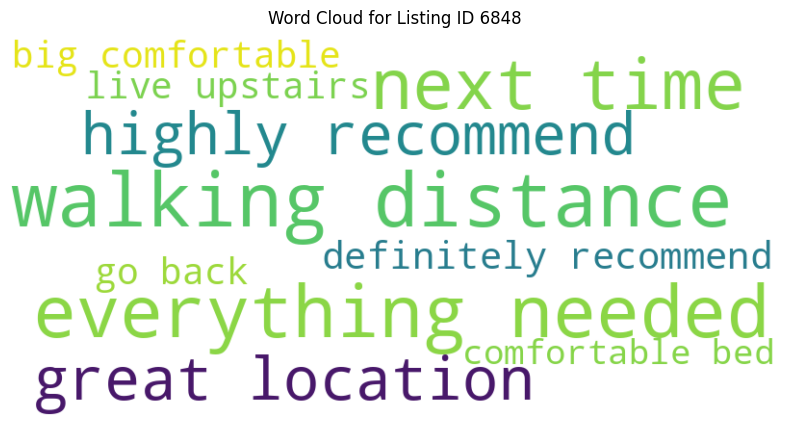

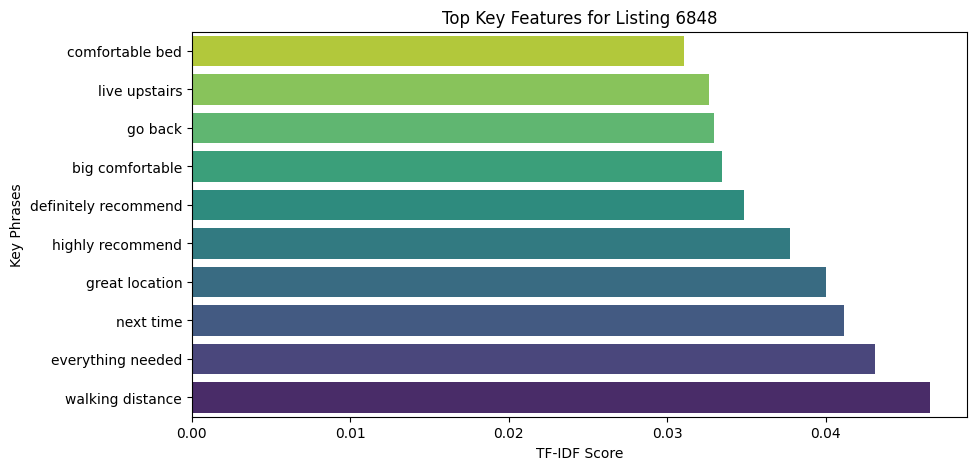

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Specify the listing ID
selected_listing_id = 6848
print(f"Visualizing Key Themes for Listing ID: {selected_listing_id}")

# Extract TF-IDF features for the specified listing
listing_features = tfidf_results_by_listing[
    tfidf_results_by_listing["listing_id"] == selected_listing_id
]

# Create Word Cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(dict(zip(listing_features["feature"], listing_features["mean_tfidf"])))

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud for Listing ID {selected_listing_id}")
plt.show()

# Create Bar Chart for Key Phrases
plt.figure(figsize=(10, 5))
sns.barplot(
    y=listing_features["feature"],
    x=listing_features["mean_tfidf"],
    palette="viridis"
)
plt.xlabel("TF-IDF Score")
plt.ylabel("Key Phrases")
plt.title(f"Top Key Features for Listing {selected_listing_id}")
plt.gca().invert_yaxis()
plt.show()

### 12.6.2. Manhattan

In [ ]:
# Define stopwords (combine NLTK + Airbnb-specific words)
stopwords_to_remove = list(stopwords_to_remove)
stopwords_to_remove.extend([
    'apartment', 'room', 'stay', 'place', 'host', 'Airbnb', 'rental', 'property',
    'would', 'also', 'could', 'get', 'like', 'made', 'in'
])

# Convert stopwords to a list before passing to TfidfVectorizer
stopwords_to_remove = list(stopwords_to_remove)

# Function to extract and sort top TF-IDF n-gram features per listing
def extract_tfidf_per_listing(df, top_n=10, ngram_range=(2, 3)):
    listing_tfidf_results = []

    # Group by listing_id
    for listing_id, group in df.groupby("listing_id"):
        reviews = group["cleaned_reviews"]  # Use cleaned reviews directly

        # TF-IDF Vectorization
        vectorizer = TfidfVectorizer(
            stop_words=stopwords_to_remove,
            max_features=top_n * 5,  # Allow more features to ensure we get top sorted ones
            ngram_range=ngram_range
        )
        tfidf_matrix = vectorizer.fit_transform(reviews)
        feature_names = vectorizer.get_feature_names_out()
        mean_tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()

        # Create DataFrame of key phrases per listing
        tfidf_df = pd.DataFrame({
            'listing_id': listing_id,
            'feature': feature_names,
            'mean_tfidf': mean_tfidf_scores
        })

        # Sort features by their mean TF-IDF score in descending order
        tfidf_df = tfidf_df.sort_values(by='mean_tfidf', ascending=False).head(top_n)
        listing_tfidf_results.append(tfidf_df)

    # Combine results into one DataFrame
    result_df = pd.concat(listing_tfidf_results, ignore_index=True)
    return result_df

# Apply function to dataset grouped by listing_id
tfidf_results_by_listing_manhattan = extract_tfidf_per_listing(manhattan_df)

# Display results
from IPython.display import display

display(tfidf_results_by_listing_manhattan)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['airbnb'] not in stop_words.
  warnings.warn(


,listing_id,feature,mean_tfidf
0,6990,central park,0.066303
1,6990,location great,0.059498
2,6990,highly recommend,0.055326
3,6990,around corner,0.042475
4,6990,block away,0.036568
...,...,...,...
7895,1176754800801853827,great hotel,0.027980
7896,1176754800801853827,clean comfortable,0.026857
7897,1176754800801853827,great clean,0.026652
7898,1176754800801853827,central location,0.026263


Visualizing Key Themes for Listing ID: 6990


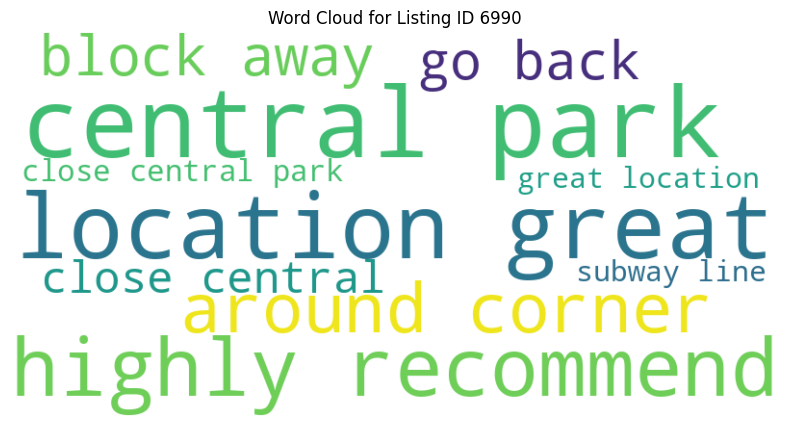

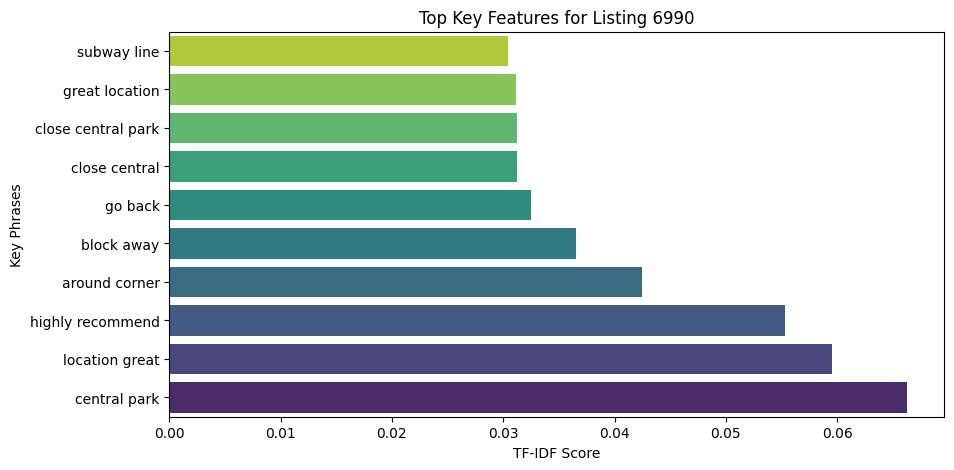

In [ ]:
# Specify the listing ID
selected_listing_id_manhattan = 6990
print(f"Visualizing Key Themes for Listing ID: {selected_listing_id_manhattan}")

# Extract TF-IDF features for the specified listing
listing_features_manhattan = tfidf_results_by_listing_manhattan[
    tfidf_results_by_listing_manhattan["listing_id"] == selected_listing_id_manhattan
]

# Create Word Cloud
wordcloud_manhattan = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(dict(zip(listing_features_manhattan["feature"], listing_features_manhattan["mean_tfidf"])))

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_manhattan, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud for Listing ID {selected_listing_id_manhattan}")
plt.show()

# Create Bar Chart for Key Phrases
plt.figure(figsize=(10, 5))
sns.barplot(
    y=listing_features_manhattan["feature"],
    x=listing_features_manhattan["mean_tfidf"],
    palette="viridis"
)
plt.xlabel("TF-IDF Score")
plt.ylabel("Key Phrases")
plt.title(f"Top Key Features for Listing {selected_listing_id_manhattan}")
plt.gca().invert_yaxis()
plt.show()

# 13.Visualizing the Features - Top Themes

## 13.1. Generating a wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(tfidf_df, title):
    # Generates a word cloud from a TF-IDF DataFrame.
    word_freq = dict(zip(tfidf_df['feature'], tfidf_df['mean_tfidf']))  # Convert to dictionary

    # Generate word cloud
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap='viridis',
        max_words=100
    ).generate_from_frequencies(word_freq)

    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

### 13.1.1. Brooklyn

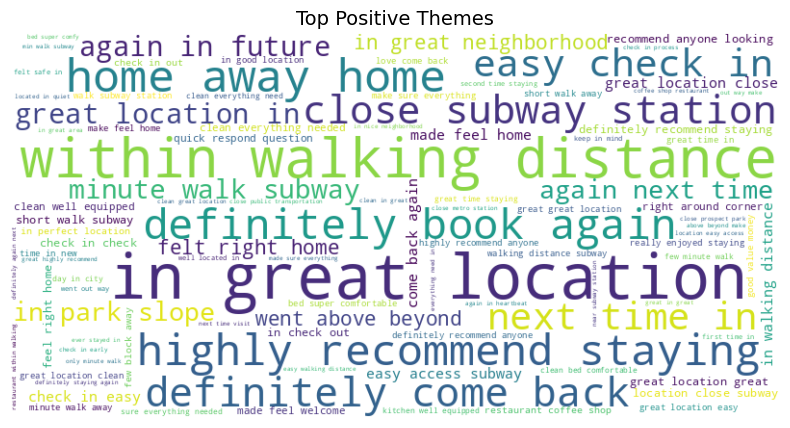

In [ ]:
# Generate word clouds for positive and negative themes
generate_wordcloud(top_positive_tfidf_order_brooklyn, "Top Positive Themes")

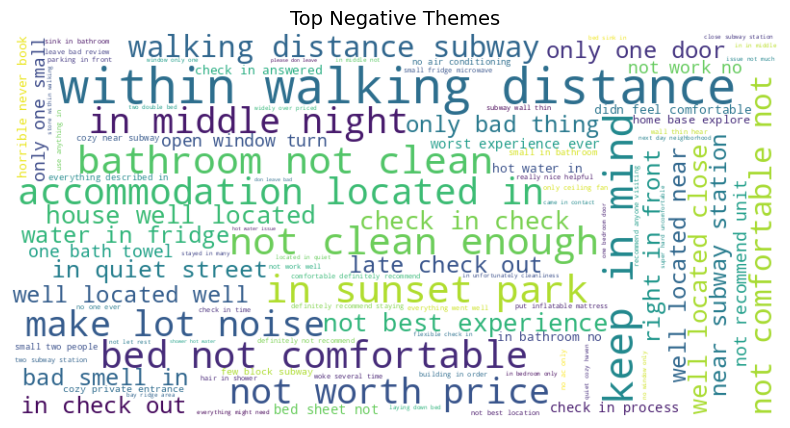

In [ ]:
generate_wordcloud(top_negative_tfidf_order_brooklyn, "Top Negative Themes")

### 13.1.2. Manhattan

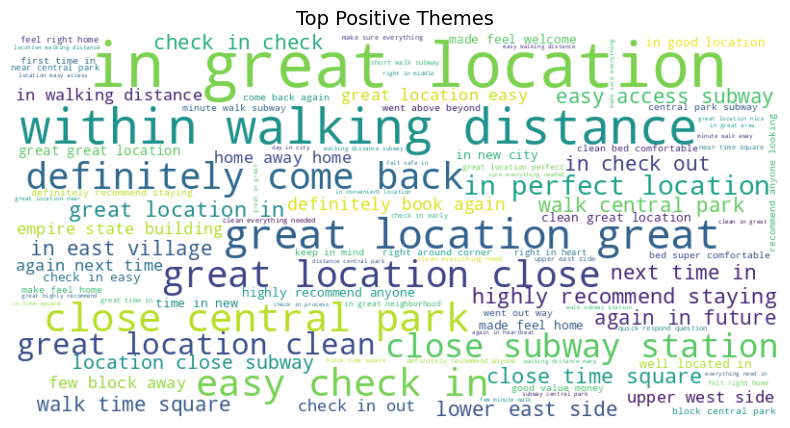

In [ ]:
# Generate word clouds for positive and negative themes
generate_wordcloud(top_positive_tfidf_order_manhattan, "Top Positive Themes")

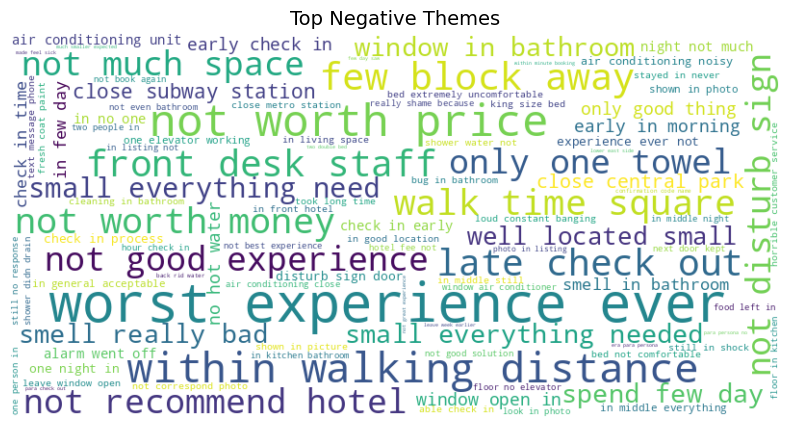

In [ ]:
generate_wordcloud(top_negative_tfidf_order_manhattan, "Top Negative Themes")

## 13.2. Property Type Against Positive/Negative Ratings

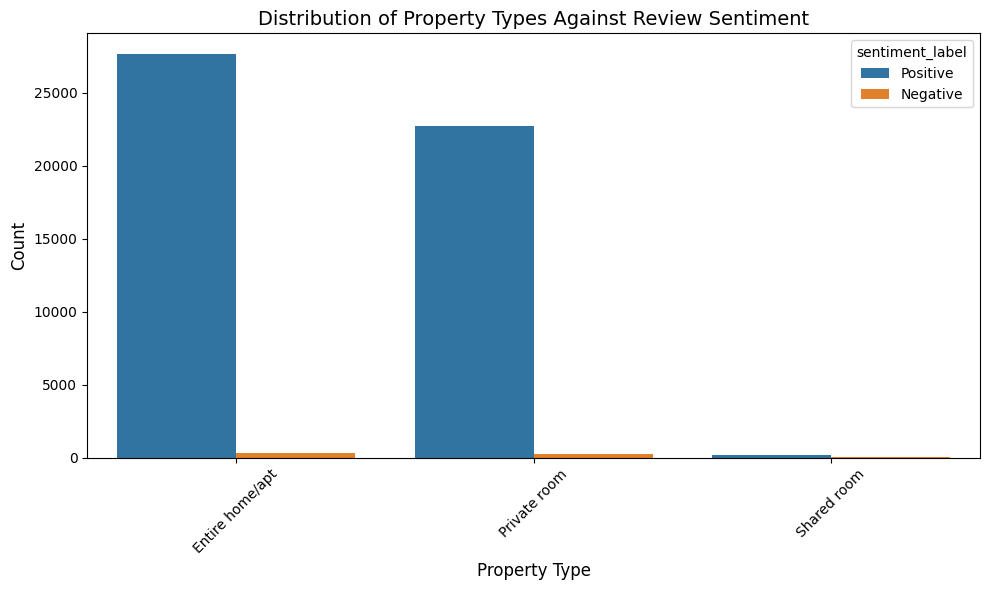

In [ ]:
# Plot the distribution of property types against review sentiment
plt.figure(figsize=(10, 6))

# Create the countplot
sns.countplot(data=brooklyn_df, x='room_type', hue='sentiment_label')

# Add labels and title
plt.title('Distribution of Property Types Against Review Sentiment', fontsize=14)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for readability

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
brooklyn_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language,cleaned_reviews,polarity,subjectivity,sentiment_label,subjectivity_label
0,25042316,1245791007484909583,2024-09-14,"The neighborhood is quiet, people are peaceful...",Brooklyn,Entire home/apt,136.0,fr,neighborhood quiet people peaceful amenity eas...,0.208333,0.402778,Positive,Mixed
1,25042316,422415092256548044,2021-08-05,Nicole is great at communicating and her home ...,Brooklyn,Entire home/apt,136.0,en,great communicating home great stay highly rec...,0.586667,0.680000,Positive,Mixed
2,25042316,410702031,2019-02-10,"Stayed again, enjoyed it again",Brooklyn,Entire home/apt,136.0,en,stayed again enjoyed again,0.500000,0.700000,Positive,Mixed
3,25042316,487608492065923667,2021-11-03,The check in process was absolutely easy! Nico...,Brooklyn,Entire home/apt,136.0,en,check in process absolutely easy responsive pl...,0.266667,0.622222,Positive,Mixed
4,25042316,469446217,2019-06-14,Not sure what the cleaning fee is charged for ...,Brooklyn,Entire home/apt,136.0,en,not sure cleaning fee charged cleaner do place...,-0.263333,0.466111,Negative,Mixed


In [ ]:
brooklyn_df['sentiment_label'].value_counts()

,count
sentiment_label,
Positive,50548
Negative,558


In [ ]:
grouped_data = brooklyn_df.groupby(['room_type', 'sentiment_label']).size()
grouped_data

room_type        sentiment_label
Entire home/apt  Negative             287
                 Positive           27681
Private room     Negative             265
                 Positive           22689
Shared room      Negative               6
                 Positive             178
dtype: int64

!!! code needs to be corrected

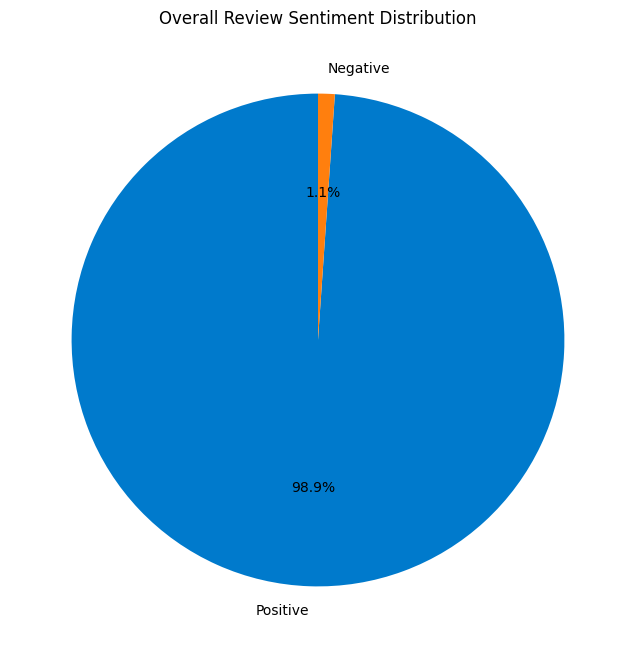

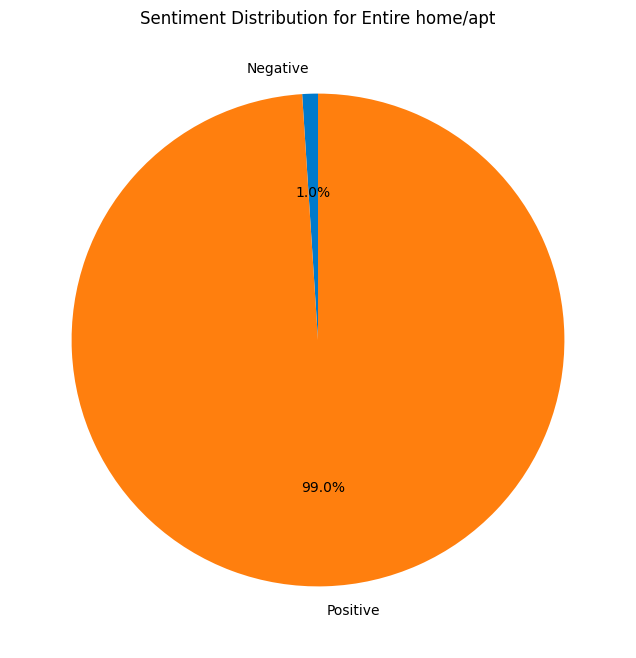

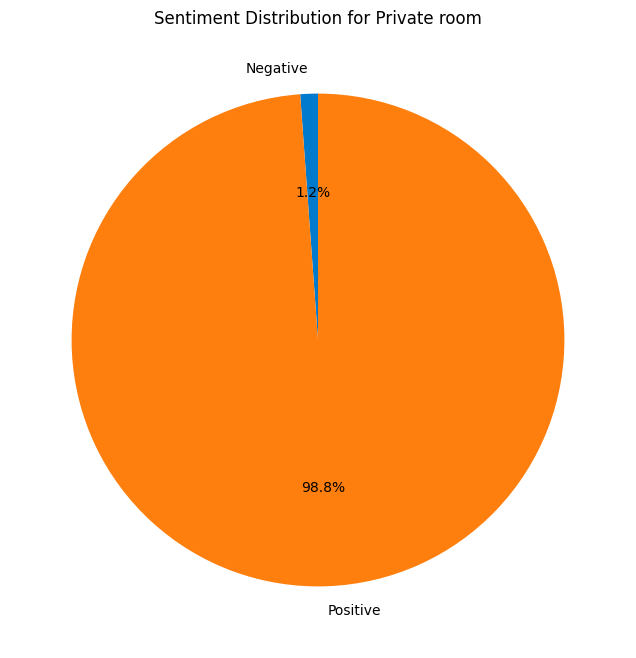

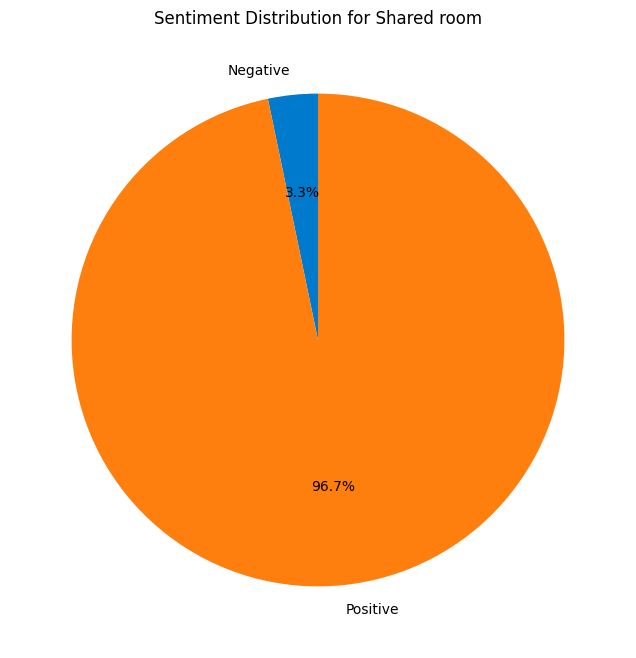

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pie chart for positive vs. negative reviews (overall distribution)
sentiment_counts = brooklyn_df['sentiment_label'].value_counts()

# Plot pie chart for sentiment distribution (positive vs negative)
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#007acc', '#ff7f0e'])
plt.title('Overall Review Sentiment Distribution')
plt.show()

# Pie chart for room type distribution by positive and negative reviews
room_type_sentiment = pd.crosstab(brooklyn_df['room_type'], brooklyn_df['sentiment_label'])

# Plot pie charts for each room type
for room_type in room_type_sentiment.index:
    plt.figure(figsize=(8, 8))
    room_type_sentiment_row = room_type_sentiment.loc[room_type]
    plt.pie(room_type_sentiment_row, labels=room_type_sentiment_row.index, autopct='%1.1f%%', startangle=90, colors=['#007acc', '#ff7f0e'])
    plt.title(f'Sentiment Distribution for {room_type}')
    plt.show()


Pie Chart breaking positive and negative reviews down by Room Type

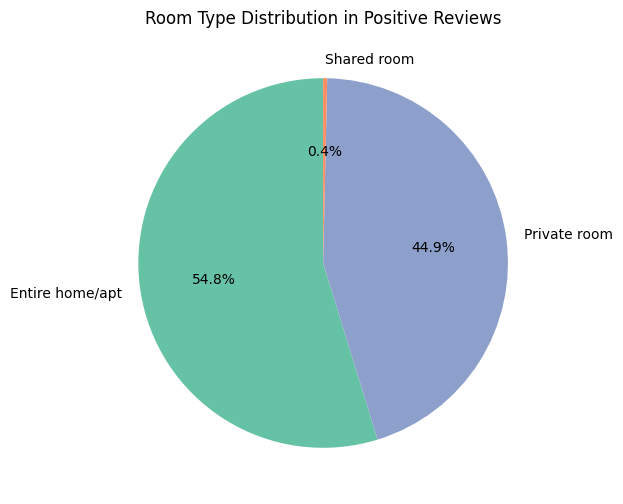

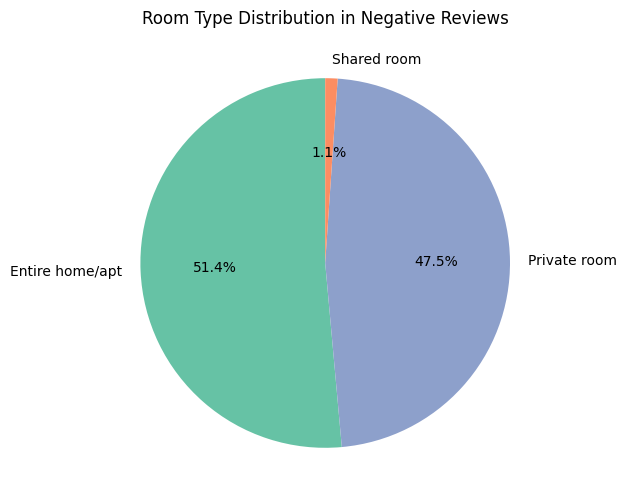

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'brooklyn_df'

# Group by sentiment and room type to get the counts of each combination
sentiment_room_type_distribution = brooklyn_df.groupby(['sentiment_label', 'room_type']).size().reset_index(name='count')

# Plot a pie chart for positive reviews with room type breakdown
positive_reviews = sentiment_room_type_distribution[sentiment_room_type_distribution['sentiment_label'] == 'Positive']
plt.figure(figsize=(6, 6))  # Smaller plot size
plt.pie(positive_reviews['count'], labels=positive_reviews['room_type'], autopct='%1.1f%%', startangle=90,
        colors=['#66c2a5', '#8da0cb', '#fc8d62'])  # Softer color scheme
plt.title('Room Type Distribution in Positive Reviews', fontsize=12)
plt.show()

# Plot a pie chart for negative reviews with room type breakdown
negative_reviews = sentiment_room_type_distribution[sentiment_room_type_distribution['sentiment_label'] == 'Negative']
plt.figure(figsize=(6, 6))  # Smaller plot size
plt.pie(negative_reviews['count'], labels=negative_reviews['room_type'], autopct='%1.1f%%', startangle=90,
        colors=['#66c2a5', '#8da0cb', '#fc8d62'])  # Softer color scheme
plt.title('Room Type Distribution in Negative Reviews', fontsize=12)
plt.show()


# 14.Appendix

##14.0. Price-Sentiment correlation

In [ ]:
# brooklyn_df = pd.read_csv('/content/drive/MyDrive/NLP Project/brooklyn_high_reviewcount_translated.csv')
brooklyn_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language,cleaned_reviews,polarity,subjectivity,sentiment_label,subjectivity_label
0,25042316,1245791007484909583,2024-09-14,"The neighborhood is quiet, people are peaceful...",Brooklyn,Entire home/apt,136.0,fr,neighborhood quiet people peaceful amenity eas...,0.208333,0.402778,Positive,Mixed
1,25042316,422415092256548044,2021-08-05,Nicole is great at communicating and her home ...,Brooklyn,Entire home/apt,136.0,en,great communicating home great stay highly rec...,0.586667,0.680000,Positive,Mixed
2,25042316,410702031,2019-02-10,"Stayed again, enjoyed it again",Brooklyn,Entire home/apt,136.0,en,stayed again enjoyed again,0.500000,0.700000,Positive,Mixed
3,25042316,487608492065923667,2021-11-03,The check in process was absolutely easy! Nico...,Brooklyn,Entire home/apt,136.0,en,check in process absolutely easy responsive pl...,0.266667,0.622222,Positive,Mixed
4,25042316,469446217,2019-06-14,Not sure what the cleaning fee is charged for ...,Brooklyn,Entire home/apt,136.0,en,not sure cleaning fee charged cleaner do place...,-0.263333,0.466111,Negative,Mixed


In [ ]:
# Save DataFrame to CSV
brooklyn_df.to_csv('brooklyn_46_sentiment_labelled.csv', index=False)

# Trigger a download prompt in the browser
files.download('brooklyn_46_sentiment_labelled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
correlation_brook = brooklyn_df['price'].corr(brooklyn_df['polarity'])
print(f"The correlation between price and sentiment score for Manhattan listings is: {correlation_brook}")

The correlation between price and sentiment score for Manhattan listings is: 0.0436878779667727


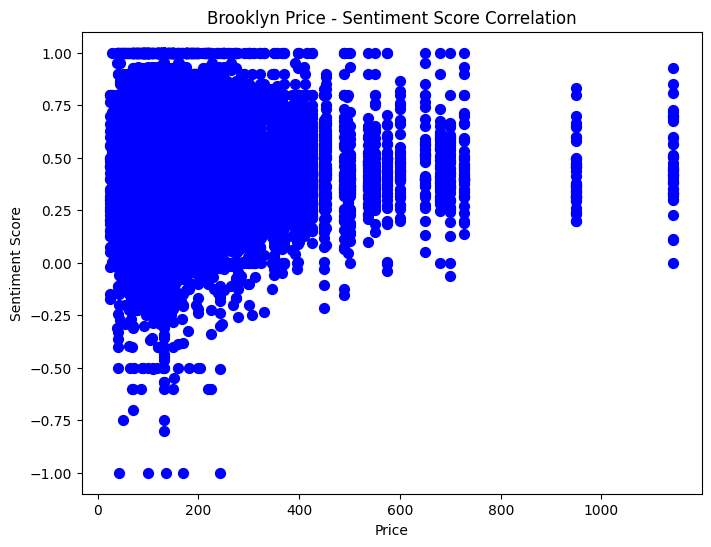

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(brooklyn_df['price'], brooklyn_df['polarity'],marker='o', color='blue', s=50) # Customize marker, color, and size

plt.xlabel("Price")
plt.ylabel("Sentiment Score")
plt.title('Brooklyn Price - Sentiment Score Correlation')

plt.show()

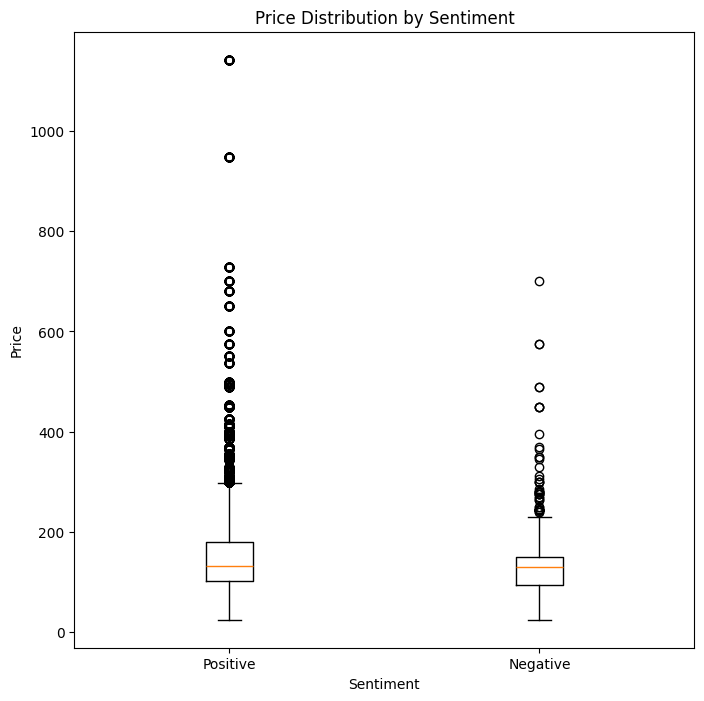

In [ ]:
plt.figure(figsize = (8,8))

brooklyn_positive = brooklyn_df[brooklyn_df['sentiment_label'] == 'Positive']
brooklyn_negative = brooklyn_df[brooklyn_df['sentiment_label'] == 'Negative']
plt.boxplot([brooklyn_positive['price'],brooklyn_negative['price']])

plt.xlabel('Sentiment')
plt.ylabel('Price')
plt.xticks([1, 2], ['Positive', 'Negative'])
plt.title('Price Distribution by Sentiment')

plt.show()

In [ ]:
import pandas as pd

In [ ]:
manhattan_test = pd.read_csv('/content/drive/MyDrive/NLP Project/manhattan_file.csv')
manhattan_test[manhattan_test['price'] == 10000]['reviews']

,reviews
257688,"This place is exactly as described, perfect fo..."


In [ ]:
manhattan_senti_df['price'].max()

10000.0

In [ ]:
brooklyn_df = pd.read_csv('/content/drive/MyDrive/NLP Project/brooklyn_46_sentiment_labelled.csv')
brooklyn_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language,cleaned_reviews,polarity,subjectivity,sentiment_label,subjectivity_label
0,25042316,1245791007484909583,2024-09-14,"The neighborhood is quiet, people are peaceful...",Brooklyn,Entire home/apt,136.0,fr,neighborhood quiet people peaceful amenity eas...,0.208333,0.402778,Positive,Mixed
1,25042316,422415092256548044,2021-08-05,Nicole is great at communicating and her home ...,Brooklyn,Entire home/apt,136.0,en,great communicating home great stay highly rec...,0.586667,0.680000,Positive,Mixed
2,25042316,410702031,2019-02-10,"Stayed again, enjoyed it again",Brooklyn,Entire home/apt,136.0,en,stayed again enjoyed again,0.500000,0.700000,Positive,Mixed
3,25042316,487608492065923667,2021-11-03,The check in process was absolutely easy! Nico...,Brooklyn,Entire home/apt,136.0,en,check in process absolutely easy responsive pl...,0.266667,0.622222,Positive,Mixed
4,25042316,469446217,2019-06-14,Not sure what the cleaning fee is charged for ...,Brooklyn,Entire home/apt,136.0,en,not sure cleaning fee charged cleaner do place...,-0.263333,0.466111,Negative,Mixed


In [ ]:
manhattan_senti_df = pd.read_csv('/content/drive/MyDrive/NLP Project/manhattan_senti.csv')
manhattan_senti_df.head()

,listing_id,review_id,date,reviews,neighbourhood_group,room_type,price,language,cleaned_reviews,polarity,subjectivity,sentiment_label,subjectivity_label
0,17684359,230019718,2018-01-26,Great stay as all the previous ones I've had i...,Manhattan,Entire home/apt,146.0,en,great stay previous one apartment thanks atten...,0.308333,0.504167,Positive,Mixed
1,53708171,754379870949520639,2022-11-06,We loved Emilio’s beautiful home! The room was...,Manhattan,Private room,209.0,en,loved beautiful home room spacious clean comfo...,0.578788,0.772727,Positive,Subjective
2,20356917,615289725,2020-03-07,Ronald is a great host! Always enjoy staying h...,Manhattan,Private room,78.0,en,great host always enjoy staying highly recommend,0.453333,0.596667,Positive,Mixed
3,22192417,222758237,2017-12-30,We had a great stay in NYC at Kendrick’s! Thi...,Manhattan,Entire home/apt,146.0,en,great stay location walked empire state buildi...,0.230357,0.685714,Positive,Mixed
4,40335341,613739021865444819,2022-04-26,Marlyn's place is great and comfortable. The m...,Manhattan,Entire home/apt,162.0,en,place great comfortable main door downstairs l...,0.097940,0.509890,Positive,Mixed


In [ ]:
correlation = manhattan_senti_df['price'].corr(manhattan_senti_df['polarity'])
print(f"The correlation between price and sentiment score for Manhattan listings is: {correlation}")

The correlation between price and sentiment score for Manhattan listings is: 0.03697933402142558


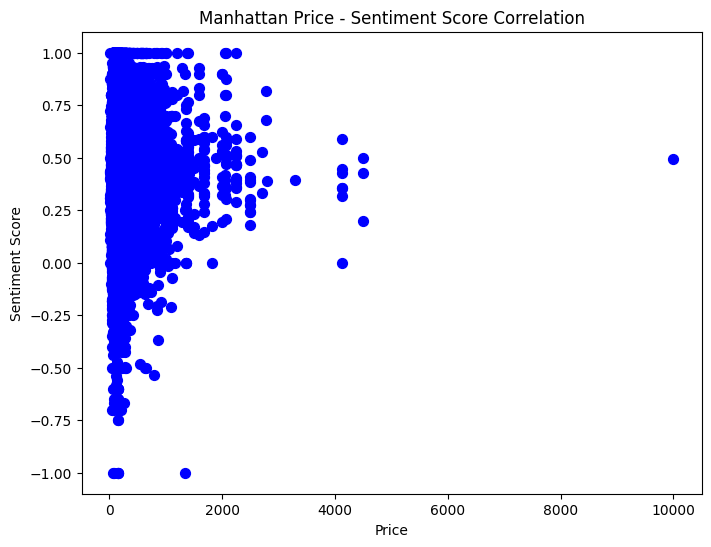

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(manhattan_senti_df['price'], manhattan_senti_df['polarity'],marker='o', color='blue', s=50) # Customize marker, color, and size

plt.xlabel("Price")
plt.ylabel("Sentiment Score")
plt.title('Manhattan Price - Sentiment Score Correlation')

plt.show()

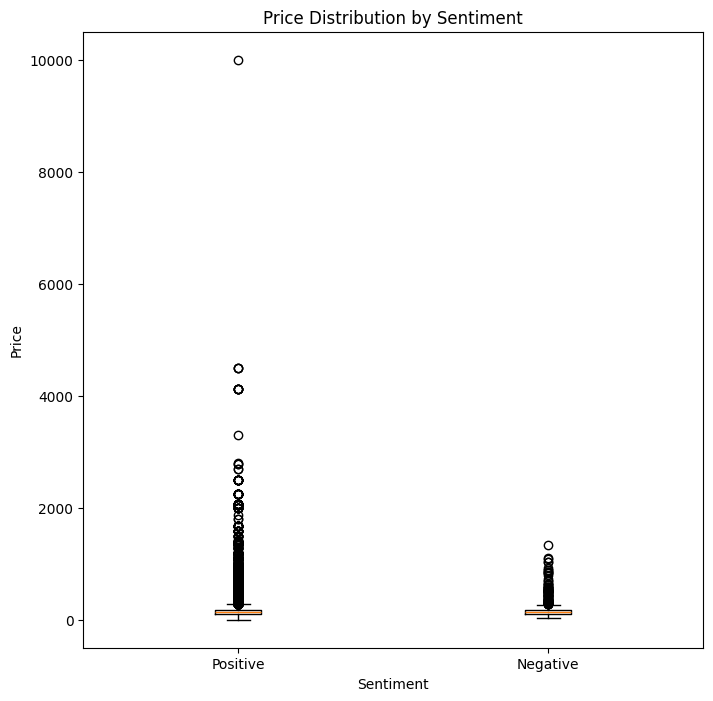

In [ ]:
plt.figure(figsize = (8,8))

manhattan_positive = manhattan_senti_df[manhattan_senti_df['sentiment_label'] == 'Positive']
manhattan_negative = manhattan_senti_df[manhattan_senti_df['sentiment_label'] == 'Negative']
plt.boxplot([manhattan_positive['price'],manhattan_negative['price']])

plt.xlabel('Sentiment')
plt.ylabel('Price')
plt.xticks([1, 2], ['Positive', 'Negative'])
plt.title('Price Distribution by Sentiment')

plt.show()

## 14.1. Plots

### 14.1.1. Room Distribution


Room Type Counts:
room_type
Entire home/apt    492065
Private room       469361
Hotel room           4800
Shared room          3025
Name: count, dtype: int64


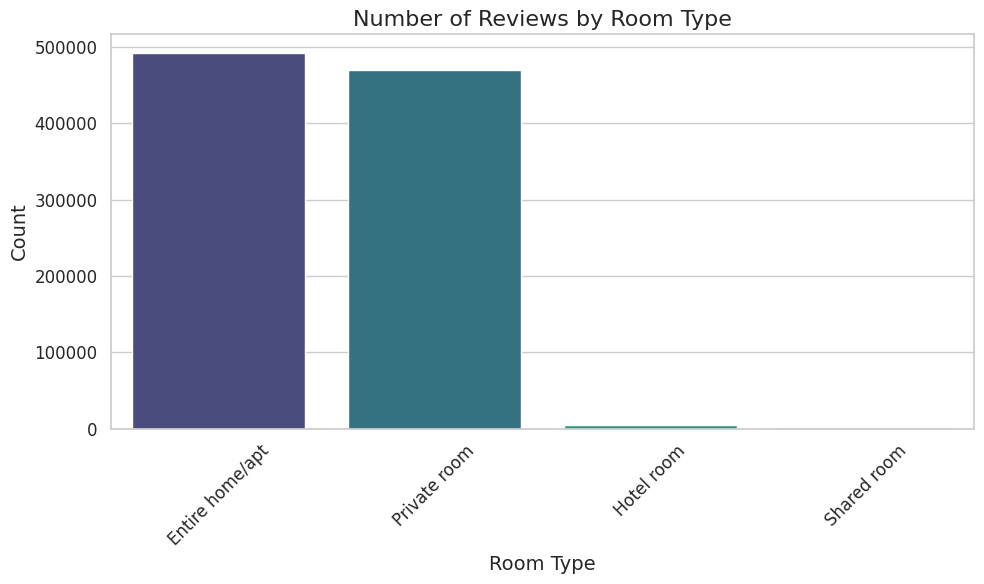

In [ ]:
# Plot 2: Room Type Distribution
room_type_counts = reviews_merged_df['room_type'].value_counts()
print("\nRoom Type Counts:")
print(room_type_counts)

plt.figure()
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='viridis')
plt.title('Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 14.1.2. Number of Reviews over time

<ipython-input-35-81a9b80dea71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_merged_df['date'] = pd.to_datetime(reviews_merged_df['date'], errors='coerce')


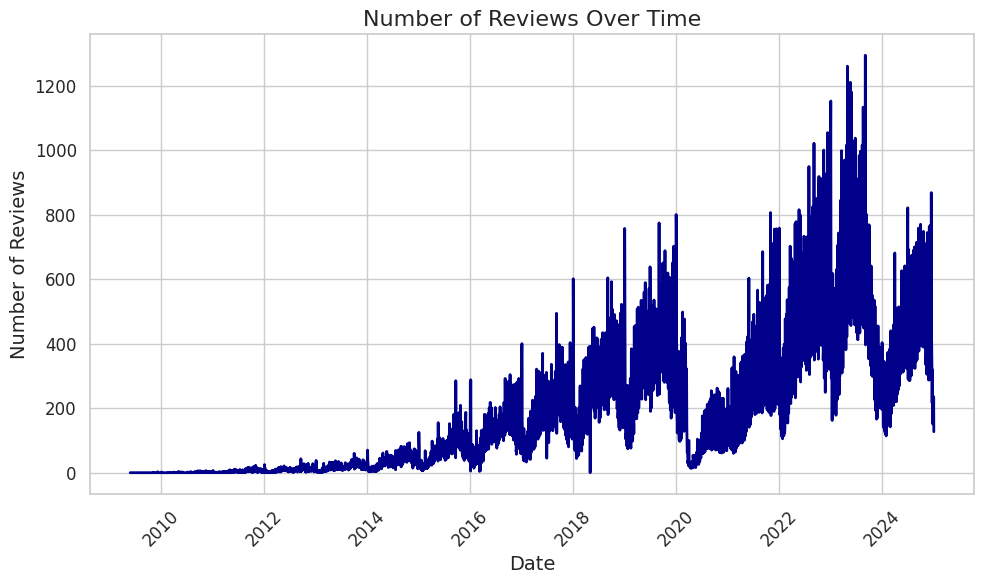

In [ ]:
# Plot 3: Number of Reviews Over Time
reviews_merged_df['date'] = pd.to_datetime(reviews_merged_df['date'], errors='coerce')
reviews_by_date = reviews_merged_df['date'].value_counts().sort_index()
plt.figure()
plt.plot(reviews_by_date.index, reviews_by_date.values, color='darkblue', linewidth=2)
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 14.1.3. Price distribution

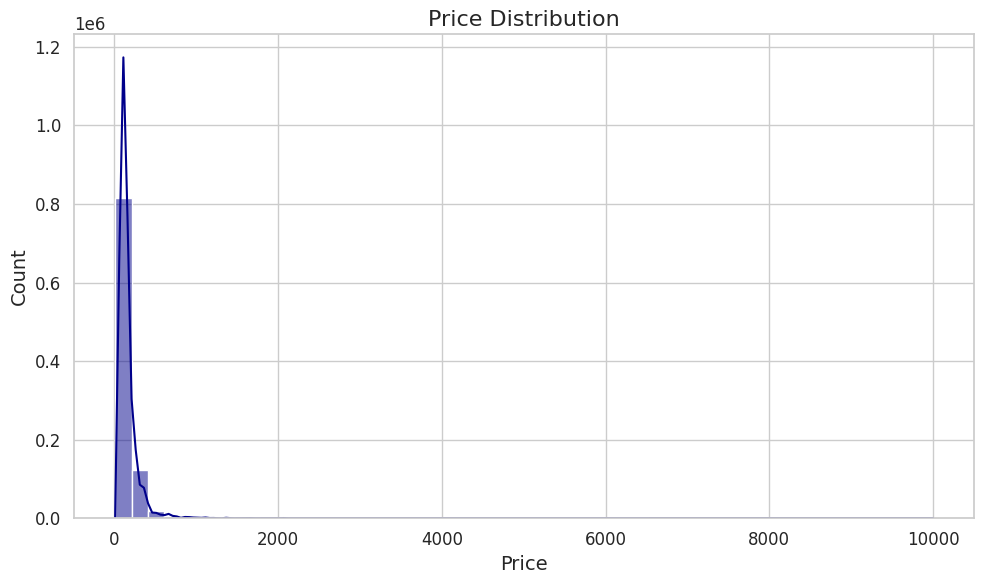

In [ ]:
# Plot 4: Price Distribution
plt.figure()
sns.histplot(reviews_merged_df['price'], bins=50, kde=True, color='darkblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 14.1.4. Review Length Distribution

<ipython-input-37-bdafdc1720b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_merged_df['review_length'] = reviews_merged_df['reviews'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)



Review Length Statistics (in words):
count    969251.000000
mean         44.991745
std          45.959195
min           1.000000
25%          15.000000
50%          32.000000
75%          60.000000
max        1001.000000
Name: review_length, dtype: float64


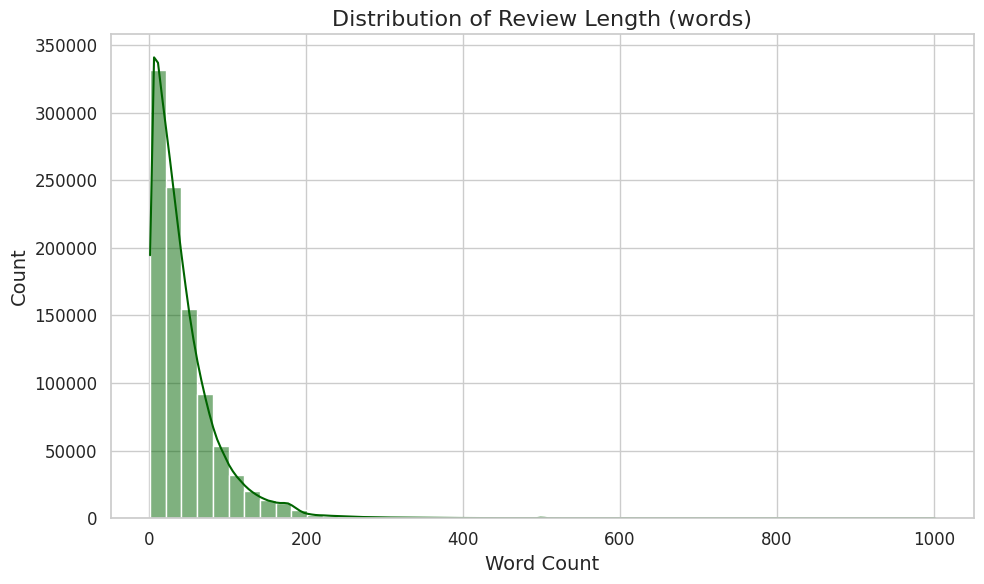

In [ ]:
# Plot 5: Review Length Distribution
# Calculate the number of words per review
reviews_merged_df['review_length'] = reviews_merged_df['reviews'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
print("\nReview Length Statistics (in words):")
print(reviews_merged_df['review_length'].describe())

plt.figure()
sns.histplot(reviews_merged_df['review_length'], bins=50, kde=True, color='darkgreen')
plt.title('Distribution of Review Length (words)')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.tight_layout()
plt.show()